In [1]:
#SETTING UP THE JUPYTER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading files
app_df=pd.read_csv(r'C:\Users\VENKATA SURYA\OneDrive\Documents\nareshit\application_data.csv')
prev_df=pd.read_csv(r'C:\Users\VENKATA SURYA\OneDrive\Documents\nareshit\previous_application.csv')
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Database dimension
print("Database dimension-applicationDF:",app_df.shape)
print("Database dimension-previousDF:",prev_df.shape)
#Database size
print("Databasesize-applicationDF:",app_df.size)
print("Databasesize-previousDF:",prev_df.size)

Database dimension-applicationDF: (307511, 122)
Database dimension-previousDF: (1670214, 37)
Databasesize-applicationDF: 37516342
Databasesize-previousDF: 61797918


In [6]:
# Database column types
#verbose is used to get detailed info about dataframe set as true
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
prev_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
# Checking the numeric variables of the dataframes
#describe is a static apprach of calculation of all required components..
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<Axes: >

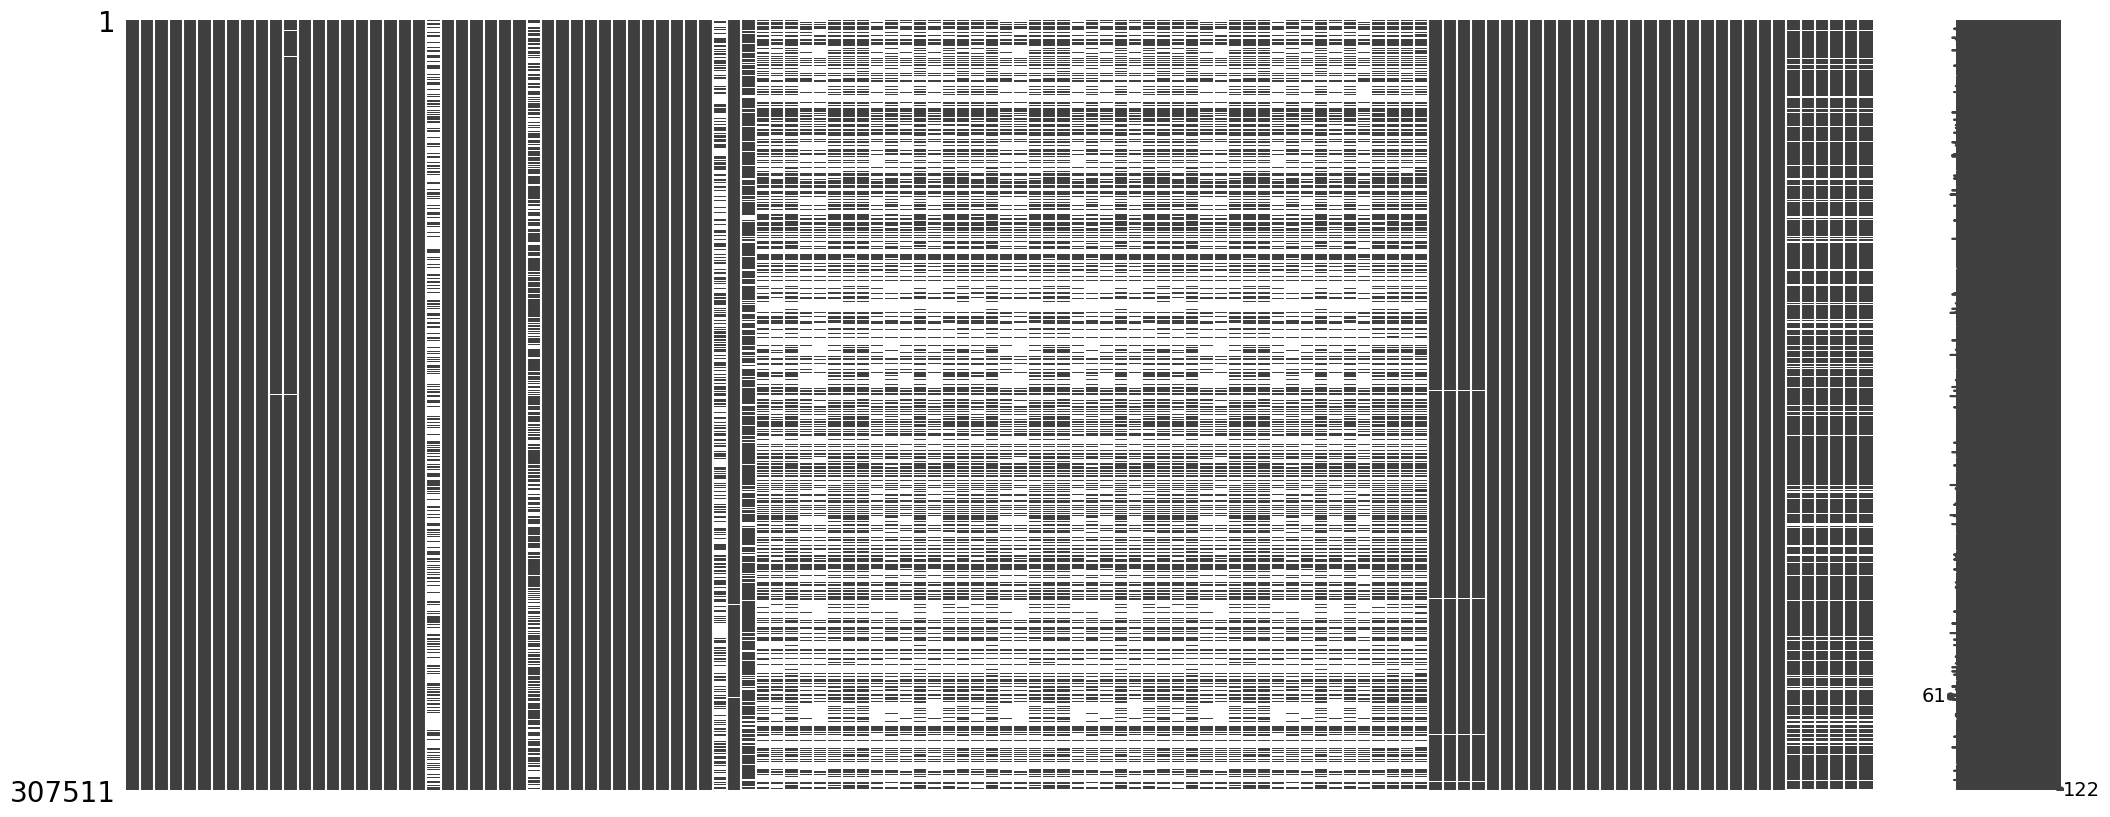

In [10]:
#Data Cleaning and Manipulation
import missingno as mn
mn.matrix(app_df)

In [11]:
!pip install missingno


Defaulting to user installation because normal site-packages is not writeable


<Axes: >

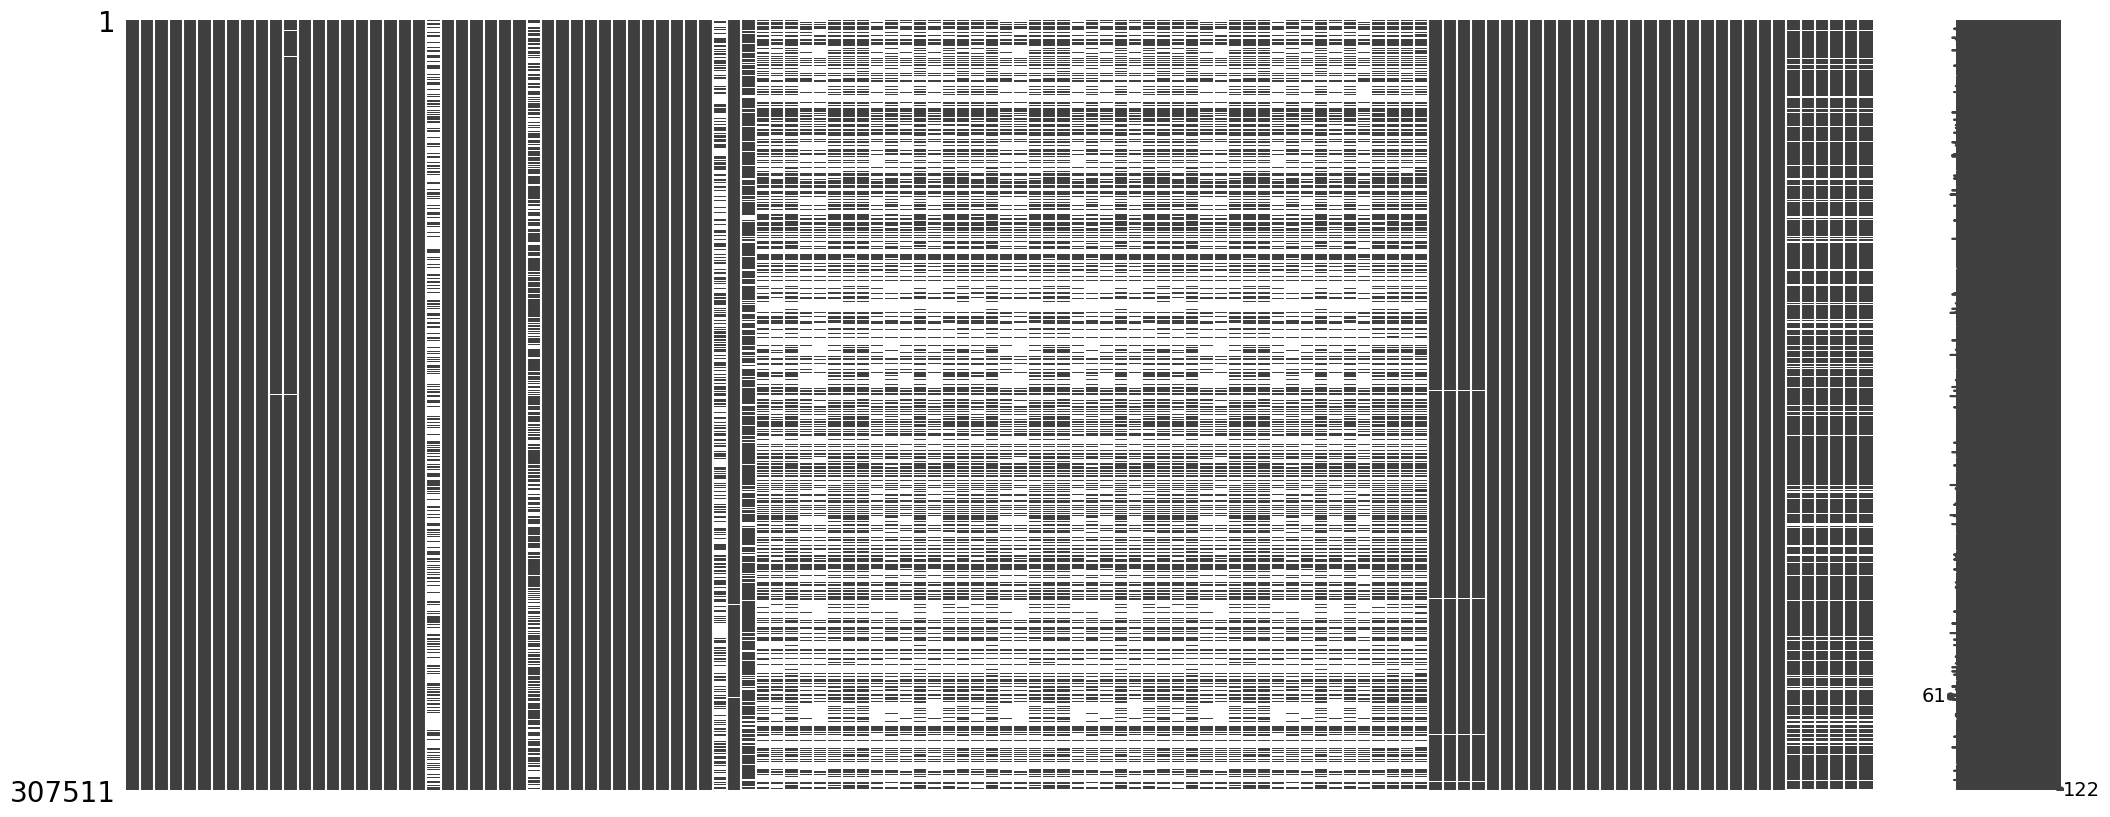

In [12]:
#Data Cleaning and Manipulation
import missingno as mn
mn.matrix(app_df)

<Axes: >

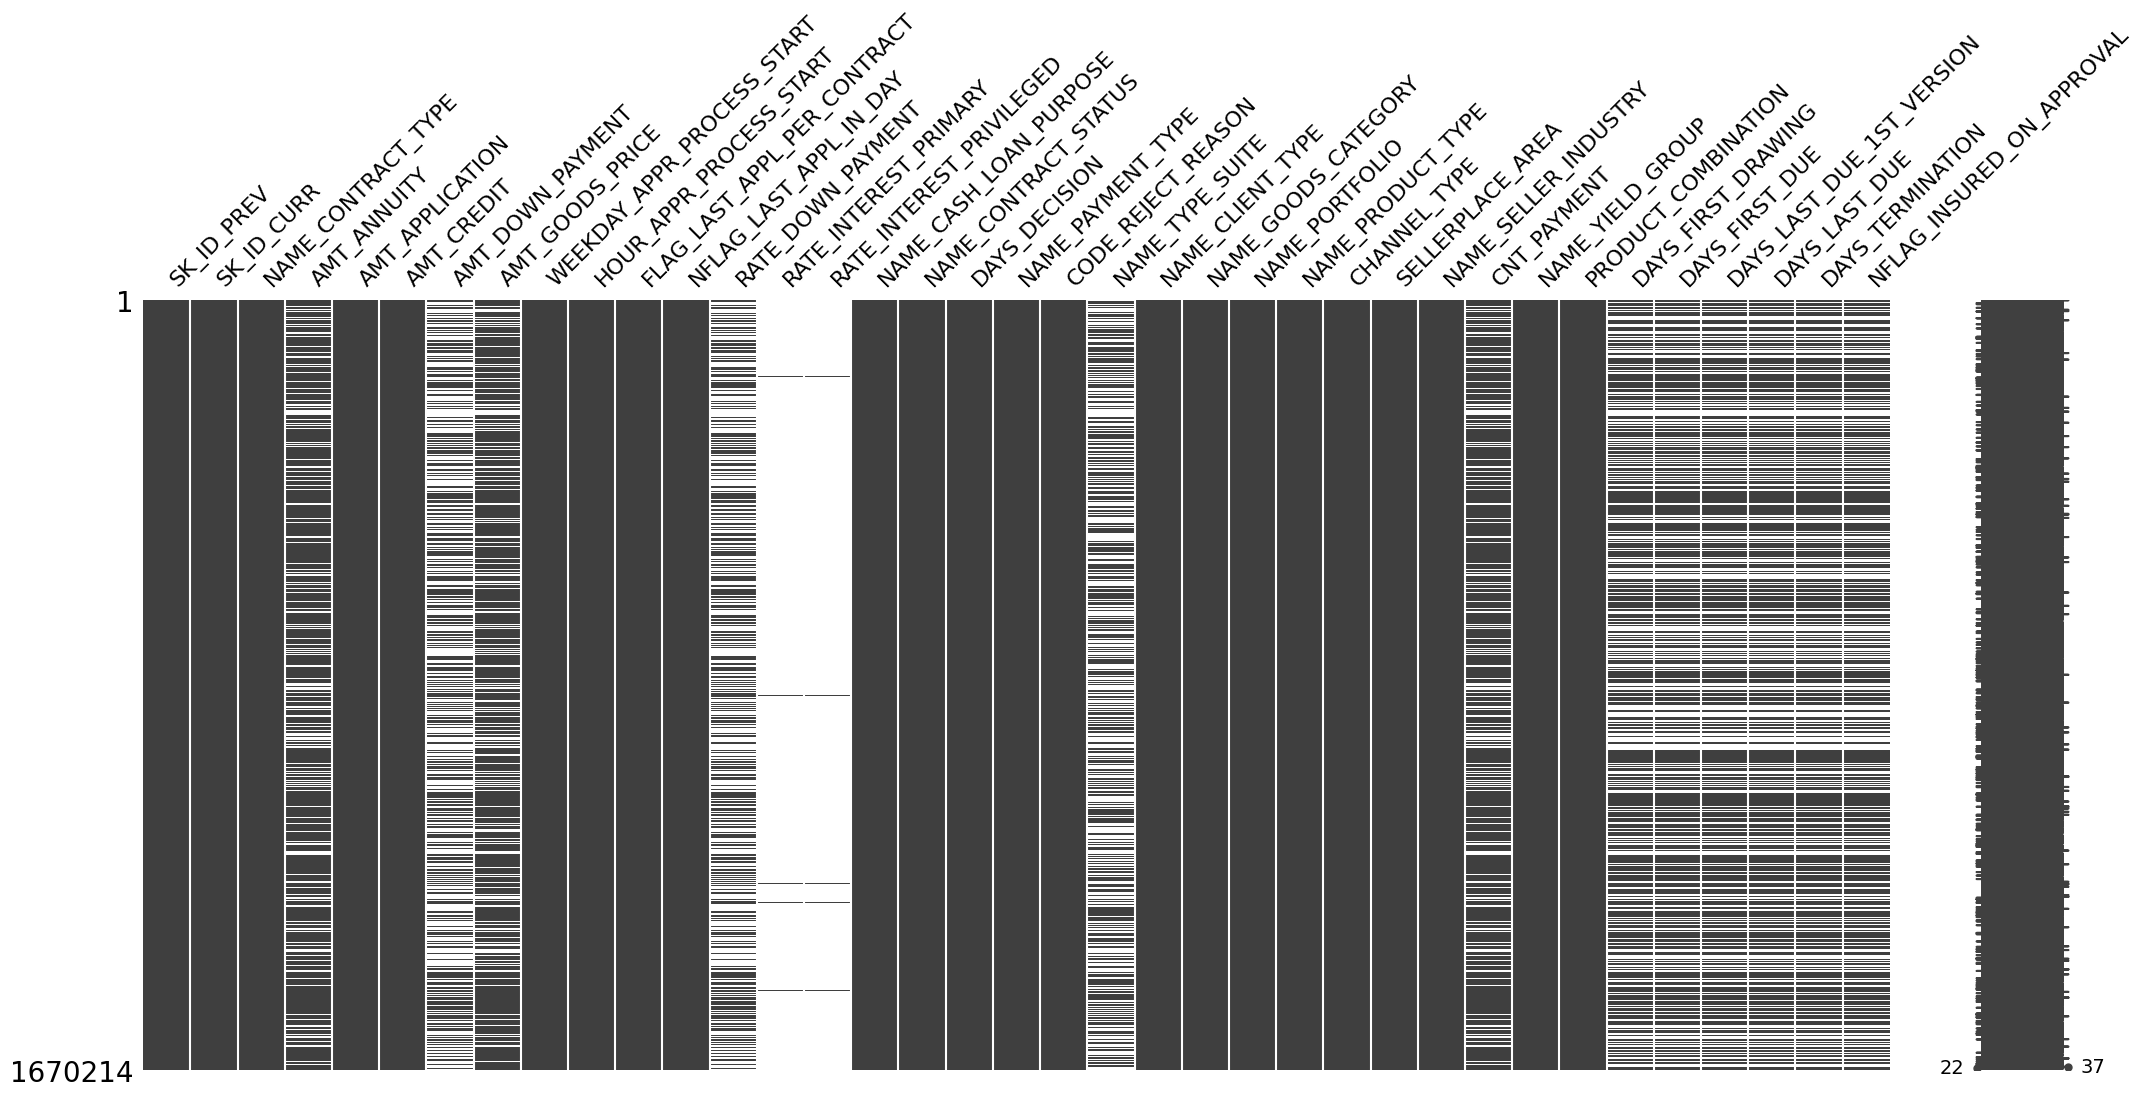

In [13]:
#Data Cleaning and Manipulation
import missingno as mn
mn.matrix(prev_df)

In [14]:
#findiing the percentage of missing values and reseting the coloumn name..
new_appdf = pd.DataFrame((app_df.isnull().sum()) * 100 / app_df.shape[0]).reset_index()
new_appdf.columns = ['Column Name', 'Null Values Percentage']
new_appdf

,Column Name,Null Values Percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


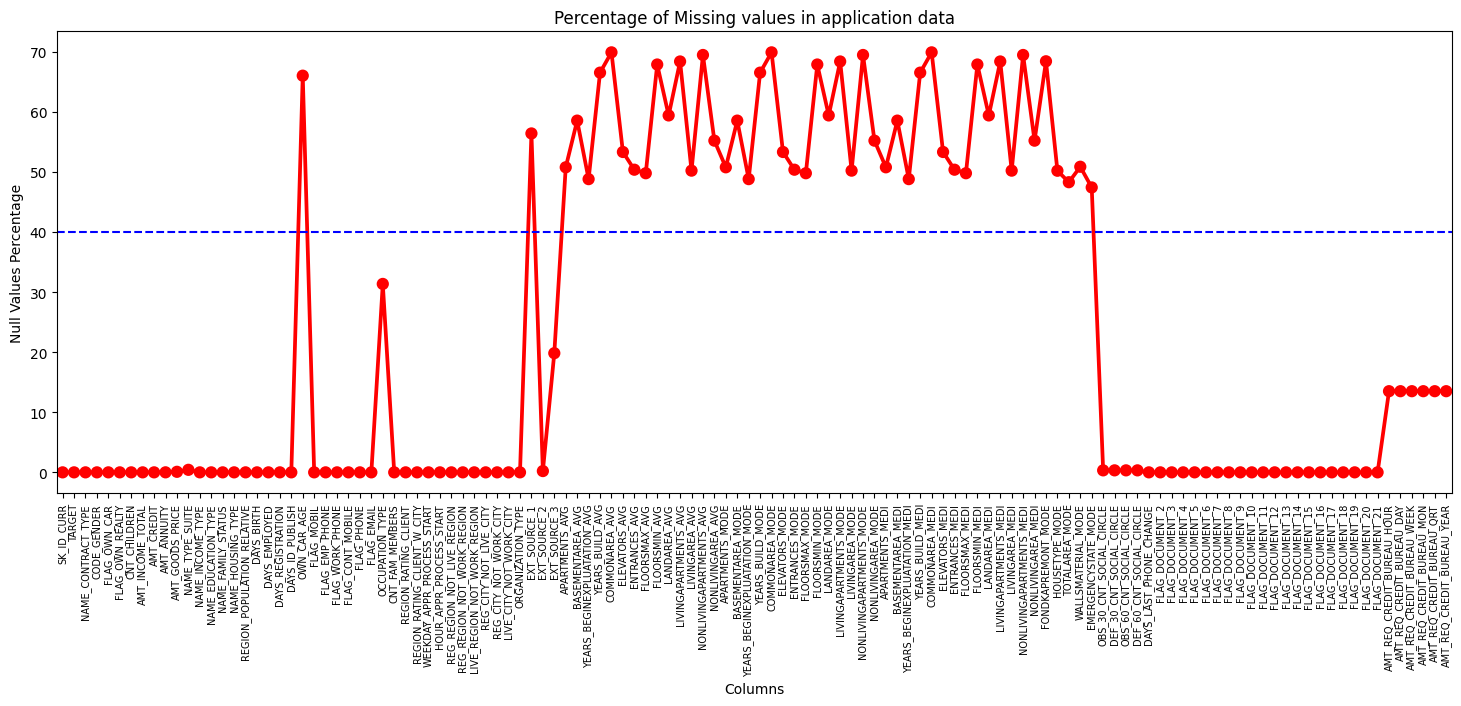

In [15]:
#getting to know how many missing values as per required mark of dataset.
fig = plt.figure(figsize=(18, 6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=new_appdf, color='red')
plt.xticks(rotation=90, fontsize=7)
ax.axhline(40, ls='--', color='blue') #used to draw horizontal line at required mark.
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns")
plt.show()


In [16]:
null_col_app=new_appdf[new_appdf["Null Values Percentage"]>=40]
null_col_app

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [17]:
#finding length
len(null_col_app)

49

In [18]:
#49 columns have more than 40% null values
#applications dataframe optimization completed.
#now working with previous data for meanigful insights.

<Axes: >

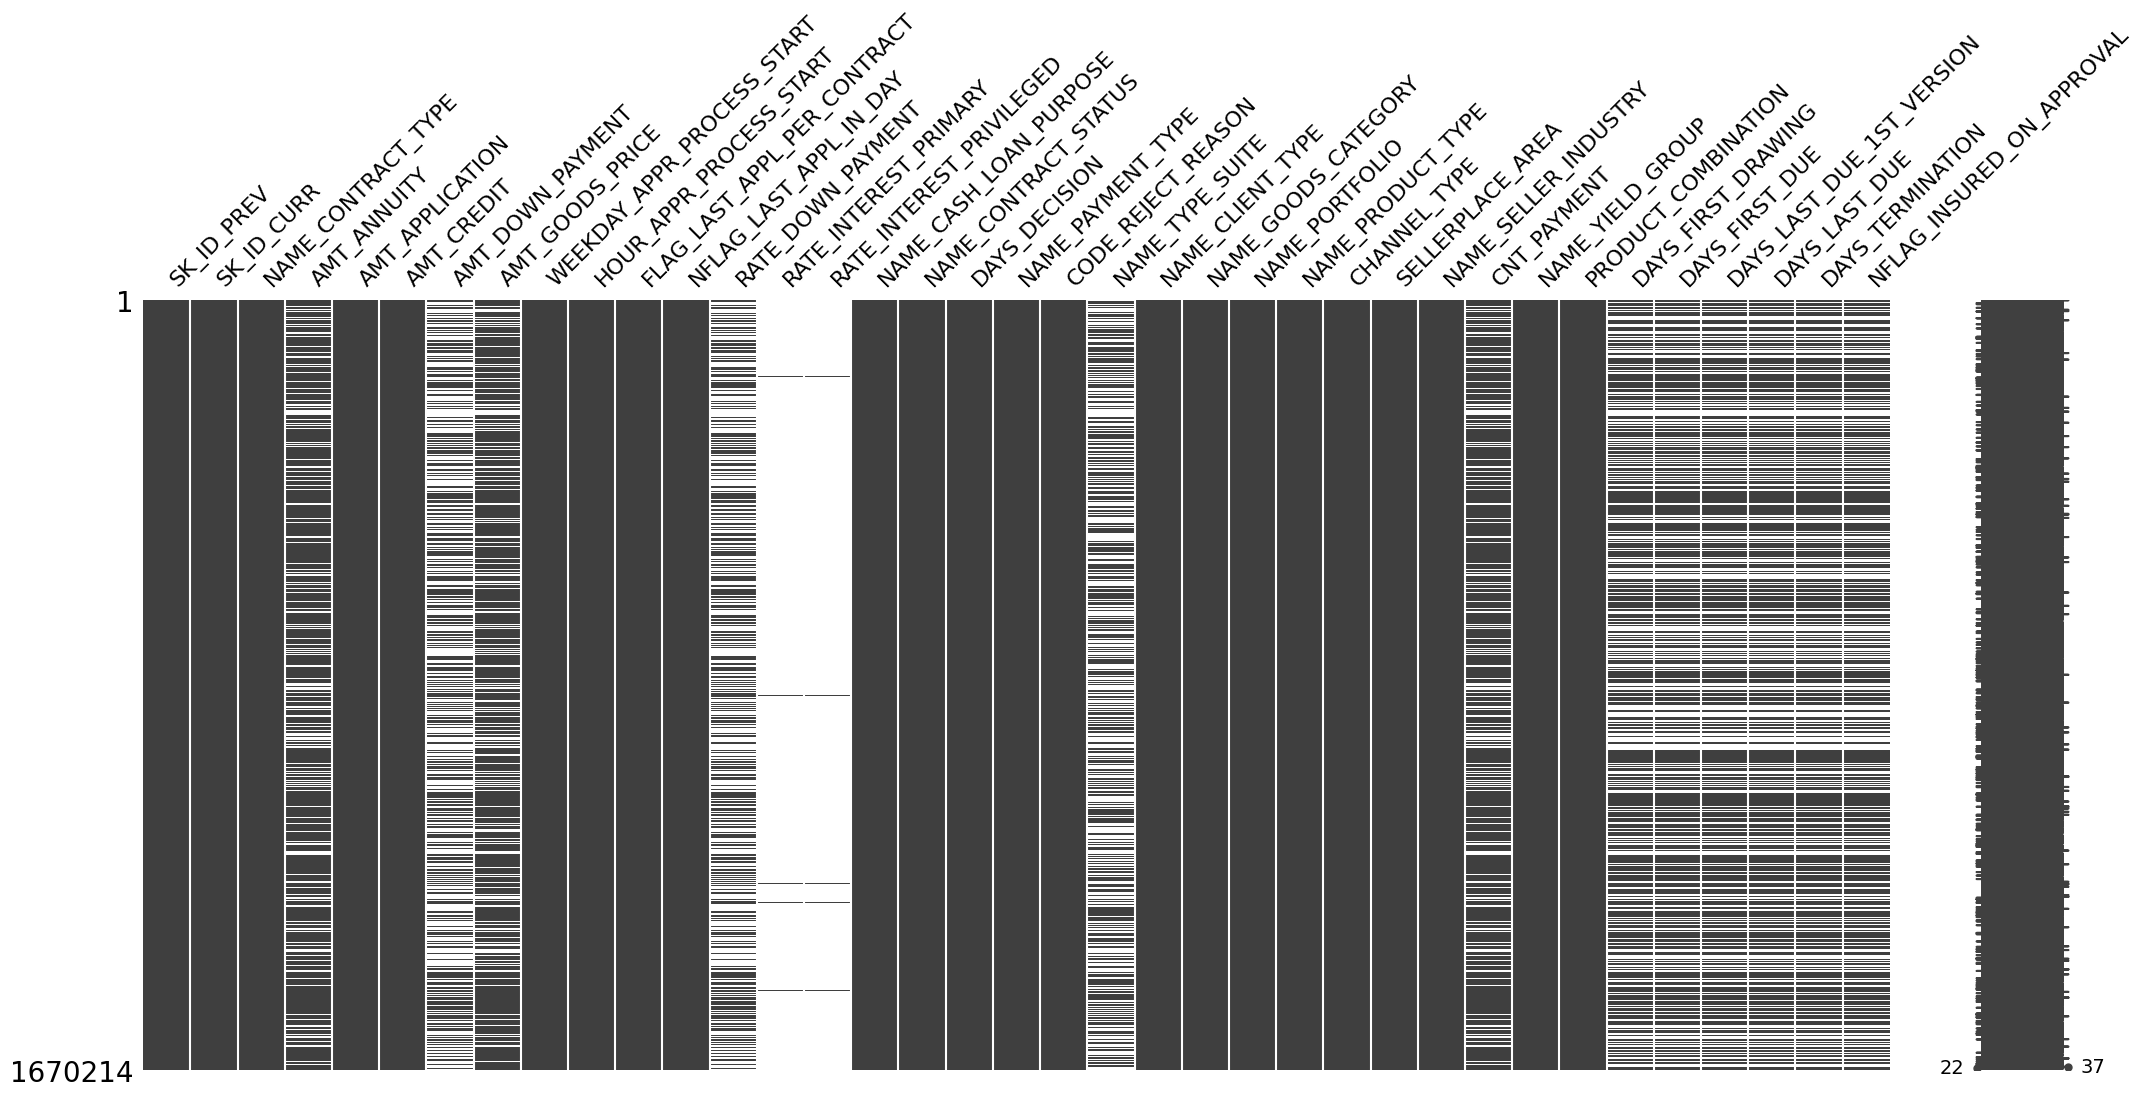

In [19]:
#checking values of previous data
import missingno as mn
mn.matrix(prev_df)

In [20]:
#checking null values in previous data
round(prev_df.isnull().sum()/prev_df.shape[0]*100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [21]:
#plotting graph for missing values in previous data.
new_prevdf = pd.DataFrame((prev_df.isnull().sum()) * 100 / prev_df.shape[0]).reset_index()
new_prevdf.columns = ['Column Name', 'Null Values Percentage']
new_prevdf

,Column Name,Null Values Percentage
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


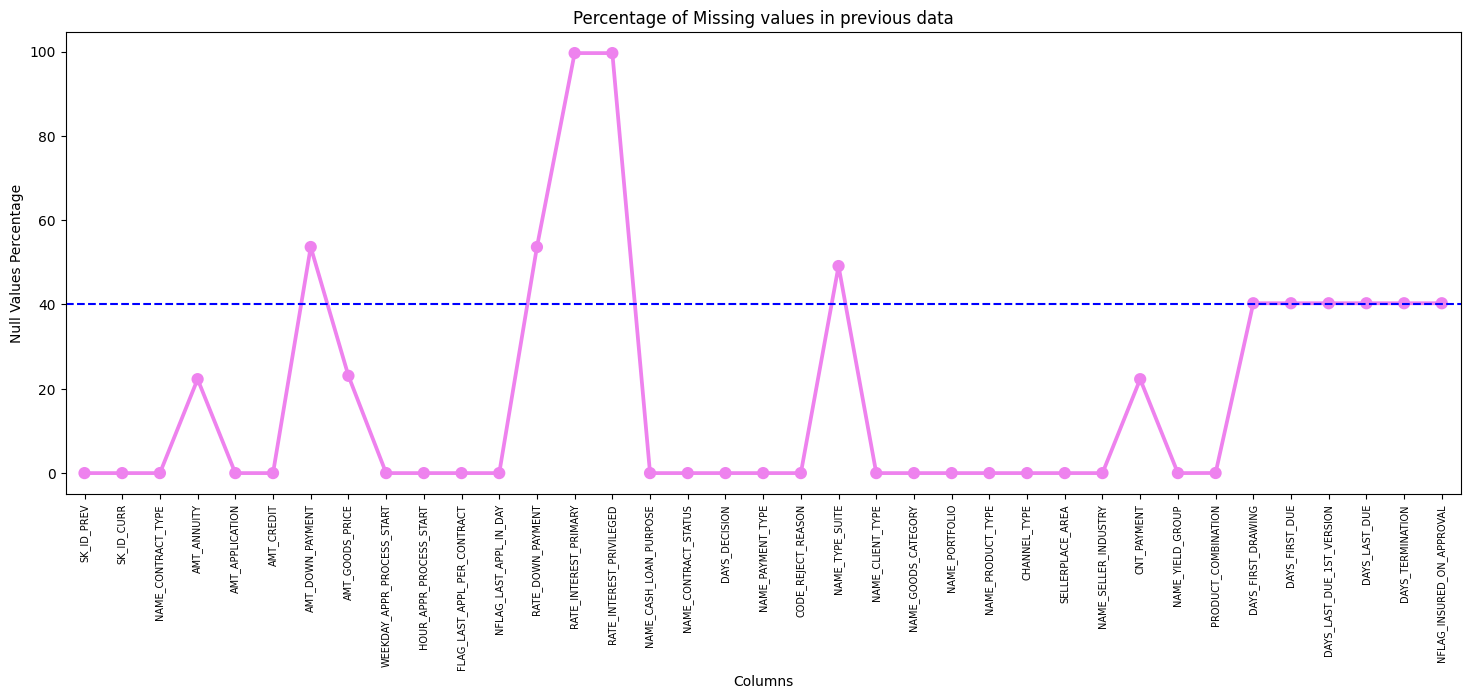

In [22]:
#got null values now plot using the data
fig = plt.figure(figsize=(18, 6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=new_prevdf, color='violet')
plt.xticks(rotation=90, fontsize=7)
ax.axhline(40, ls='--', color='blue') #used to draw horizontal line at required mark.
plt.title("Percentage of Missing values in previous data")
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns")
plt.show()


In [23]:
#get to know how many have null values grather than 40%
null_col_prev=new_prevdf[new_prevdf["Null Values Percentage"]>=40]
null_col_prev

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [24]:
len(null_col_prev)

11

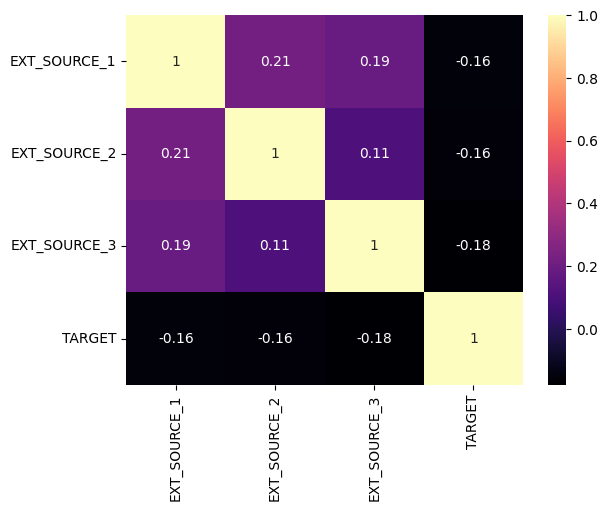

In [25]:
#removing unnecessary data from appliation and previous data and analyze more on the 40% candidate values
#we will be using exit source module for deleting the unnecessary data.
#deletion and analysis is called exit source
Source = app_df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="magma")
#here finding the correlation points of missing values around 40% and delete the unnecessary data.
#exit sources are the deleteion values rest are the correlated values for anlyze and optimixe.

In [26]:
#now deleting the unwanted values
Unwanted_app= null_col_app["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in null_col_app
len(Unwanted_app)

51

In [27]:
#51 values out of that 40% are unwanted and are under deletion

In [28]:
#now the task is to find the clients who has a loan application but didnt submitted their requored documents using flag documentation representtion.

In [29]:
#now taking a independent variable and now checking whether the relation between indeopendent variable and loan repayment statue matches or not

In [30]:
#now presenting the flag documents indicating the presence or absence of the loan repayment
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
col_Doc

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [31]:
#now creating a subset data frame which only has the col_doc column and the target column to know the pending status.
df_flag = app_df[col_Doc + ["TARGET"]]
df_flag
#this is the pending status for the application block

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
#checking the lenght of col_doc for further analysis
length = len(col_Doc)
length

20

In [33]:
#now to target the values where 1 will be defaulter and 0 will be repayer for the loan application pending status
df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter", 0:"Repayer"})
df_flag["TARGET"]

0         Defaulter
1           Repayer
2           Repayer
3           Repayer
4           Repayer
            ...    
307506      Repayer
307507      Repayer
307508      Repayer
307509    Defaulter
307510      Repayer
Name: TARGET, Length: 307511, dtype: object

In [34]:
#now we got the complete status who's loan is pending and who's not 
#so lets visualize and plot for further deep information
#creating a figure sixe
fig = plt.figure(figsize=(27,34))
fig

<Figure size 2700x3400 with 0 Axes>

<Figure size 2700x3400 with 0 Axes>

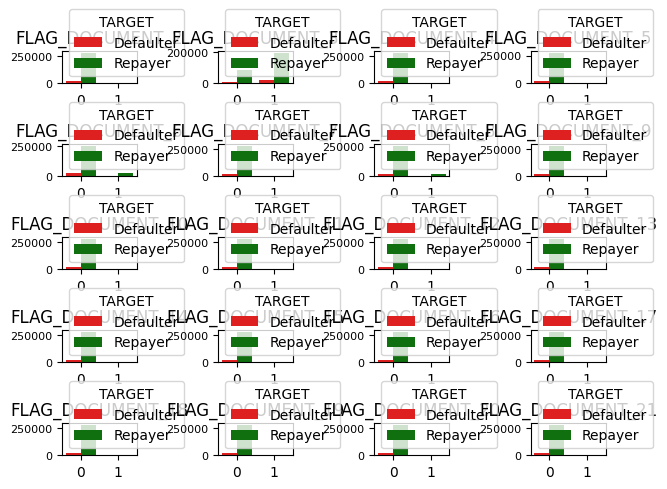

In [35]:
#for ease of analysis and space efficiency we use scatter plot for plotting our status graph
for i, j in itertools.zip_longest(col_Doc, range(len(col_Doc))):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(x=df_flag[i], hue=df_flag["TARGET"], palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.tight_layout()  # Adjust subplots to fit in to the figure area.
plt.show()


In [36]:
#though the graph is not clear but through this we got to know about te loan defaulter and payers
#its time to now remove the unwanted application
#we include the flag documents for dropping of the unwanted application
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_app = Unwanted_app + col_Doc
len(Unwanted_app)

70

In [37]:
#there are around 70 unwanted applications which need to be drawed down from our analysis or dataset.


In [38]:
#since we got our target customer we need to contact and develop a relation between contact person and how much loan payment is left
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']
contact_col

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'TARGET']

In [39]:
#calculating the correlation matrix for assessing predictive value and data insight
Contact_corr = app_df[contact_col].corr()
Contact_corr

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
FLAG_MOBIL,1.000000,-0.000845,0.000900,-0.000078,0.001128,0.000442,0.000534
FLAG_EMP_PHONE,-0.000845,1.000000,0.233801,-0.012819,-0.016131,0.062542,0.045982
FLAG_WORK_PHONE,0.000900,0.233801,1.000000,0.021580,0.293105,-0.011520,0.028524
FLAG_CONT_MOBILE,-0.000078,-0.012819,0.021580,1.000000,0.006257,-0.005356,0.000370
FLAG_PHONE,0.001128,-0.016131,0.293105,0.006257,1.000000,0.014657,-0.023806
FLAG_EMAIL,0.000442,0.062542,-0.011520,-0.005356,0.014657,1.000000,-0.001758
TARGET,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,1.000000


In [40]:
#here in the correlation 
#1 indicates a perfect positive correlation,
#-1 indicates a perfect negative correlation
#0 indicates a no correlation

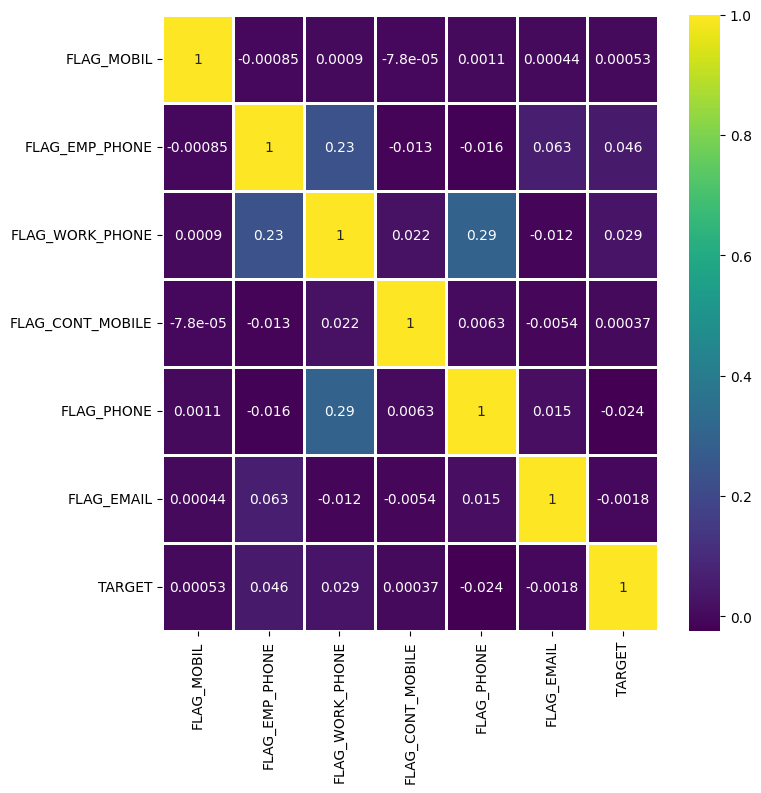

In [41]:
#plotting the heat map to know the relation of the correlation matrix
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
                 xticklabels=Contact_corr.columns,
                 yticklabels=Contact_corr.columns,
                 annot=True,
                 cmap="viridis",
                 linewidth=1)

In [42]:
#now deleting the column that has no correlation from the above mentioned graph
contact_col.remove('TARGET') 
Unwanted_app = Unwanted_app + contact_col
len(Unwanted_app)

76

In [43]:
#got the no.of columns now its time to drop from the dataset for clearer vision of analysis
app_df.drop(labels=Unwanted_app,axis=1,inplace=True)

In [44]:
#inorder to check whether the data is droped or not we use the shape fucntion for getting the size of matrix
app_df.shape

(307511, 46)

In [45]:
#we can clearly see that our data has dropped from (307511,121) to (307511,46)
#thus got the values of payers name of our required conditions

In [46]:
#checking the info of new data after dropping the columns
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [47]:
#now the process what we have done the same should be done for previous application data
#why because in order to find a relation of customers data before and after covid.
#after covid data analysis is done
#now start for before covid data
#analayzong and deleting unwanted columns in previous data
Unwanted_previous = null_col_prev["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [48]:
#these are the columns which are in our criteria of above 40%

In [49]:
#making list of rest unwanted column
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
Unnecessary_previous

['WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY']

In [50]:
#length of unwanted previous
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

15

In [51]:
#therfore total of 15 columns can be deleted from previous data which doesnt suite our criteria

In [52]:
#now getting the info of the previous data 
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [53]:
#therfore the insight is after deleting all the unnecessary columns they are 36 columns
#now to standarize the values and to develop a dtrategy for application and previous dataframe

In [54]:
#for our strategy
#we need to convert all the negative columns or bins to positive for smooth insughts of the data
#converting the negative days to positive is the first step
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in date_col:
    app_df[col] = abs(app_df[col])

In [55]:
#this code ensure the consistency and correctness of data

In [56]:
app_df['AMT_INCOME_TOTAL']=app_df['AMT_INCOME_TOTAL']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=slot)
#here we are creating boundary for each income range
#making it easier to analysis and understand the income levels of the application data

In [57]:
#calculate the percentage distribution of the categorical income ranges
app_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100
#now will able to get the percentage of each income range from vary to vary

AMT_INCOME_RANGE
100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

In [58]:
#therefore our analysis says that
#More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [59]:
#now checking the credit limit precemtage of our app data customers
app_df['AMT_CREDIT']=app_df['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']
app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=slots)

In [60]:
#now checking the % for the above credit limit percentage
app_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

In [61]:
#insight says over 16% applicants have taken a loan greater than 1M

In [62]:
#now analyze the loan section of every age group
app_df['AGE'] = app_df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']
app_df['AGE_GROUP']=pd.cut(app_df['AGE'],bins=bins,labels=slots)

In [63]:
#now try to predict the percentage of age group for loan
app_df['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

In [64]:
#31% are above 50 and 27% are in group of 30-40 etc...

In [65]:
#now will extract the user loan amount and his work experience for his desired loan amount
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
app_df['EMPLOYMENT_YEAR']=pd.cut(app_df['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [66]:
#now find the % of employed work experience
app_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

In [67]:
#over 55% of loan applicants have 0-5 yrs of work experience from our application dataset

In [68]:
#chekcing any unique values in our dataset and sort it
app_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [69]:
#lets have data info after categoring a huge analysis of our applicants
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [70]:
#inorder for data conversion in future we need all the data to be in numerical format
#changing the format of object data to category for smooth analysis for further steps
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY']
for col in categorical_columns:
    app_df[col] =pd.Categorical(app_df[col])

In [71]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [72]:
#data of object is converted to category
#therfore only numerical and categorical data is present in our database or dataet

In [73]:
#now the same process of finding each and every details of the customer in previous dataset
#same procedure but for the previous dataset 

In [74]:
#checking unique values in previous dataset of each column
prev_df.nunique().sort_values() 

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

In [75]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [76]:
#converting negative days to positive days for previous dataset
prev_df['DAYS_DECISION'] = abs(prev_df['DAYS_DECISION'])

In [77]:
#grouping the age in range format for further statistical behaviour
prev_df['DAYS_DECISION_GROUP'] = (prev_df['DAYS_DECISION']-(prev_df['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((prev_df['DAYS_DECISION'] - (prev_df['DAYS_DECISION'] % 400)) + (prev_df['DAYS_DECISION'] % 400) + (400 - (prev_df['DAYS_DECISION'] % 400))).astype(str)

In [78]:
prev_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

DAYS_DECISION_GROUP
0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: proportion, dtype: float64

In [79]:
#therfore more than 37% applicants have a decision of 0-400 days of application

In [80]:
#converting all the object variable in data to categorical form of data
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    prev_df[col] =pd.Categorical(prev_df[col])

In [81]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_DOWN_PAYMENT             774370 non-null   float64 
 7   AMT_GOODS_PRICE              1284699 non-null  float64 
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 12  RATE_DOWN_PAYMENT           

In [82]:
#therefore data has been categorized into category and numerical data

In [83]:
#since there are no missing values in our dataset we still do data imputation for rechecking he data for assurity and good analyse
#data integrity,preserver of relationship between values and many more is the advantage of a data imputation

In [84]:
round(app_df.isnull().sum() / app_df.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [85]:
#as our work we see they are 85-90% missing values in our data

In [86]:
#since got he null percentage we perform the high nulll and low null percentage from data imputation
#mode and median is used for null value percentage of categorical and numerical data
app_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [87]:
app_df['NAME_TYPE_SUITE'].fillna((app_df['NAME_TYPE_SUITE'].mode()[0]),inplace = True)
#missing values will be filled in name_type_suite with frequent value

In [88]:
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
app_df['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)
#this is the imputation for higher data percentage

In [89]:
#now will describe the data and show how data is presented after the imputation method on higher and lower null percentage
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()
#for every correspondence stage we showcase the data

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [90]:
#now to handle missing numerical data through median strategy
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    app_df[col].fillna(app_df[col].median(),inplace = True)

In [91]:
round(app_df.isnull().sum() / prev_df.shape[0] * 100.00,2)
#checking the null value % in both application and previuos dataset

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

In [92]:
#our analysis is clear and we can see there is no null value
#if also present need to ignore since % is very less

In [93]:
#now the process of data imputation in previous_dataset
round(prev_df.isnull().sum() / prev_df.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

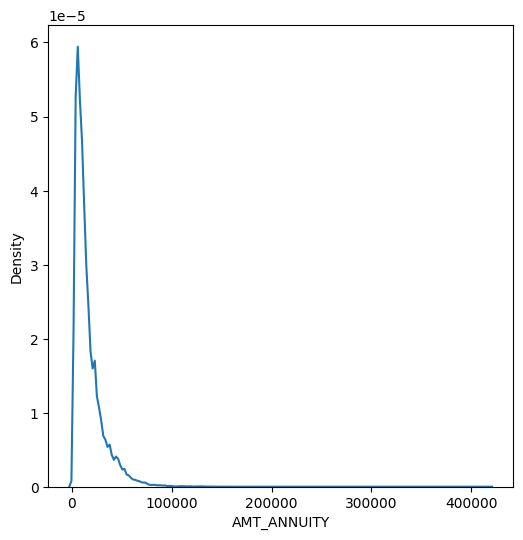

In [94]:
#since there are some values our task is to analyze the values which are present
plt.figure(figsize=(6,6))
sns.kdeplot(prev_df['AMT_ANNUITY'])
plt.show()

In [95]:
#graph indicates a peak of outliers at the left
#so imputaion process is required for the data

In [96]:
prev_df['AMT_ANNUITY'].fillna(prev_df['AMT_ANNUITY'].median(),inplace = True)

In [97]:
#analyze only on ammunity because it indicates the annual report of loan sanctioned thrugh bank

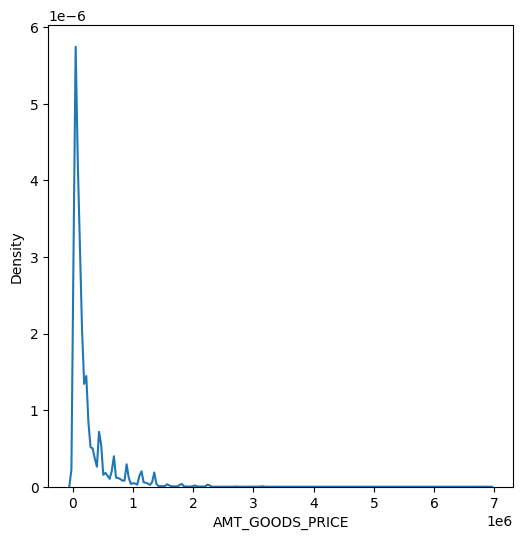

In [98]:
plt.figure(figsize=(6,6))
sns.kdeplot(prev_df['AMT_GOODS_PRICE'][pd.notnull(prev_df['AMT_GOODS_PRICE'])])
plt.show()

In [99]:
#since they are still some threads 
#we need to apply the mean,median,mode strategy for getting the corect or accurate model for our data imputed

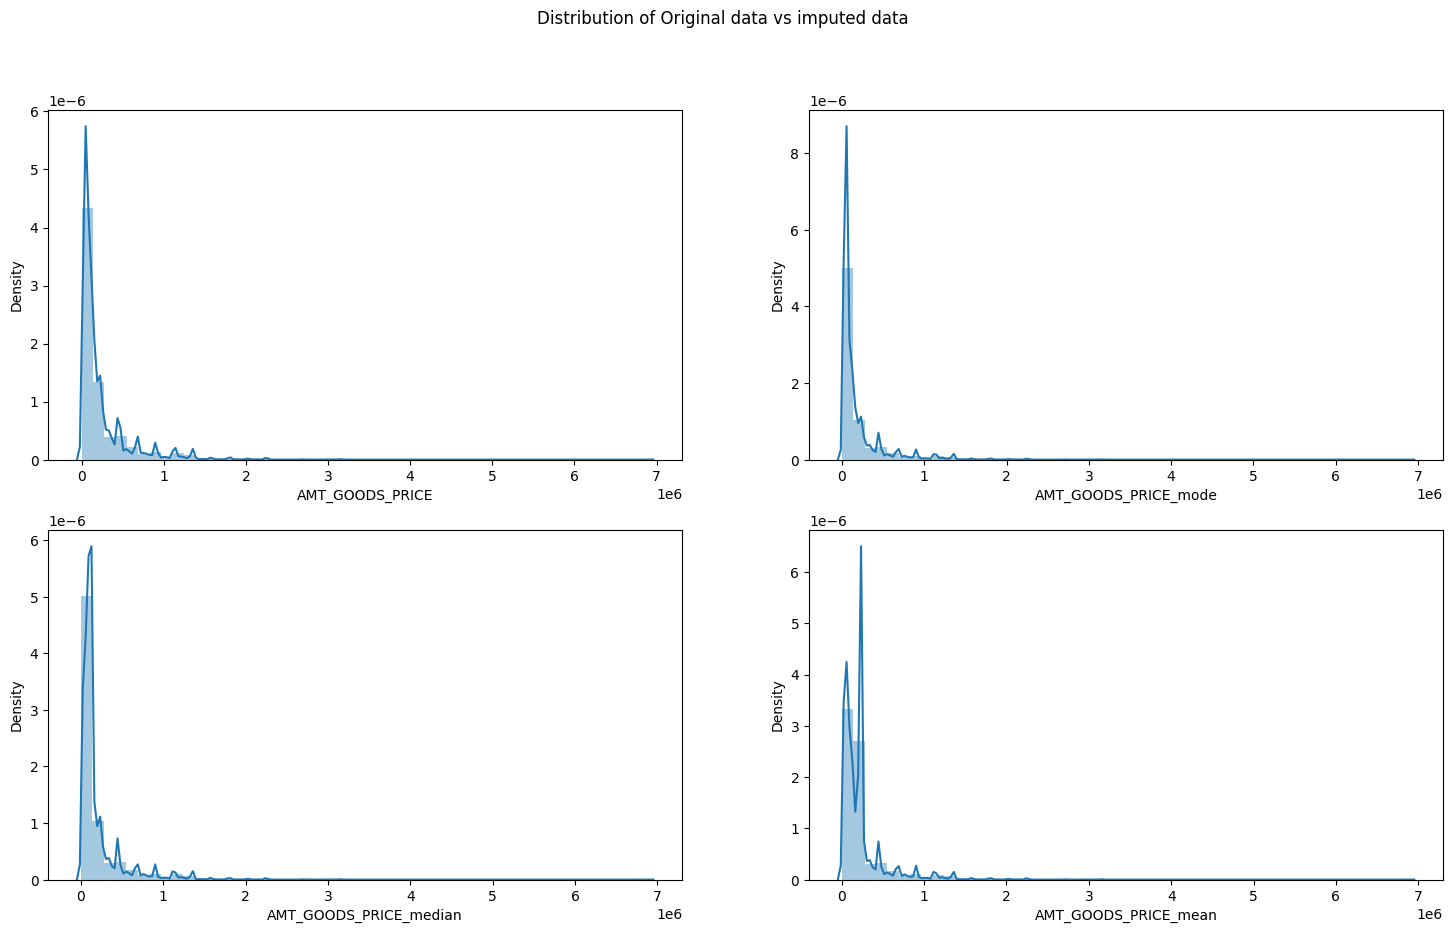

In [100]:
#mean,median,mode strategy for data imputed
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_df['AMT_GOODS_PRICE'][pd.notnull(prev_df['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

In [101]:
#thefore we can see that in mode concept there is no room for missing and value and the percentage is also getting decresed gradually
#good option of choosing mean,median,mode

In [102]:
prev_df['AMT_GOODS_PRICE'].fillna(prev_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)
#this indicates that loan have not started but the application hs been passed

In [103]:
prev_df.loc[prev_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()
#gives complete description of loan status

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [104]:
prev_df['CNT_PAYMENT'].fillna(0,inplace = True)
#fills the missing values in payment column

In [105]:
#showcasing the null value percentage
round(prev_df.isnull().sum() / prev_df.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [106]:
#the required section sfor the further process are 0 and rest can be ignored

In [107]:
#now time to identify the outliers and analyze the dataset which contains 0 values upto 95$
#also create a system so that it automaticaaly indicates the status of the applicant and its application for the database.

In [108]:
#finding outliers in app df then will find in prev df

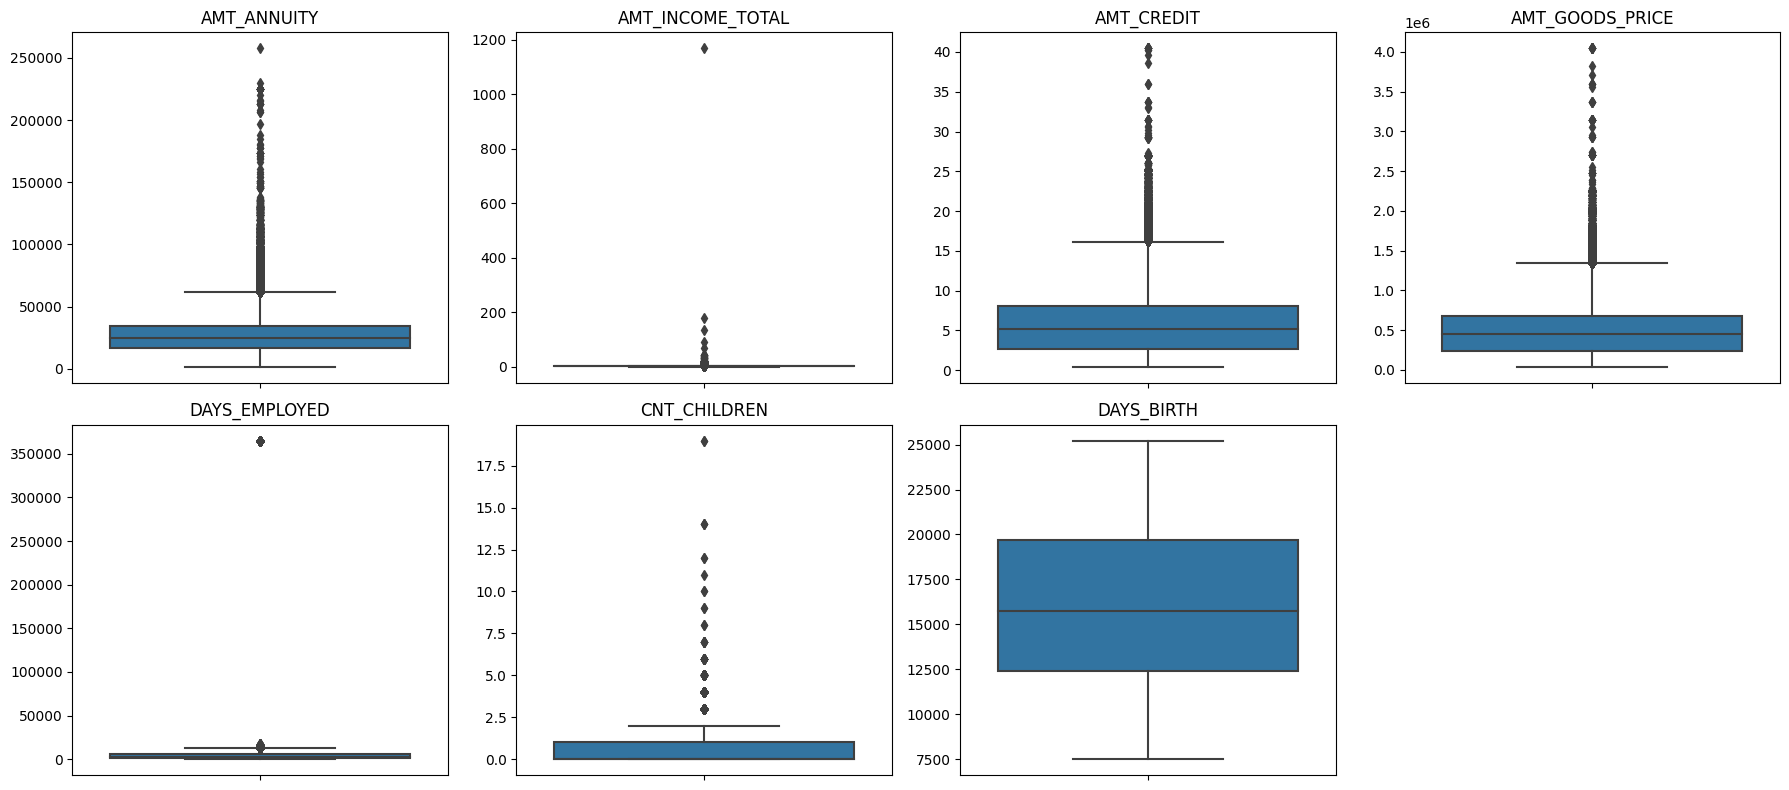

In [110]:
#in order to find outliers we need to setup the loops to write the enumerate functions so that 
#it will be easy for the user to identify the outliers
plt.figure(figsize=(18, 8))

app_outlier_col_1 = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN', 'DAYS_BIRTH']
#2 outliers of 2 columns are denoted for diiferent featuring of data

#first loop runs over outlier 1 which creates box plot-1
for i in enumerate(app_outlier_col_1):
    plt.subplot(2, 4, i[0] + 1)
    sns.boxplot(y=app_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#second loop runs over outlier which creates box plot-2
for i in enumerate(app_outlier_col_2):
    plt.subplot(2, 4, i[0] + 6)
    sns.boxplot(y=app_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

plt.tight_layout() #tight layout is used for plotting the parameters automatically for both the loops

In [111]:
#the tight layout structure directly showcases the feature of all the app_df customers and their progrssion and applications of loans

In [112]:
#now since our both app_df and prev_df data doesnt have any missing values or raw data we can clearly visualize and get all its information
app_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


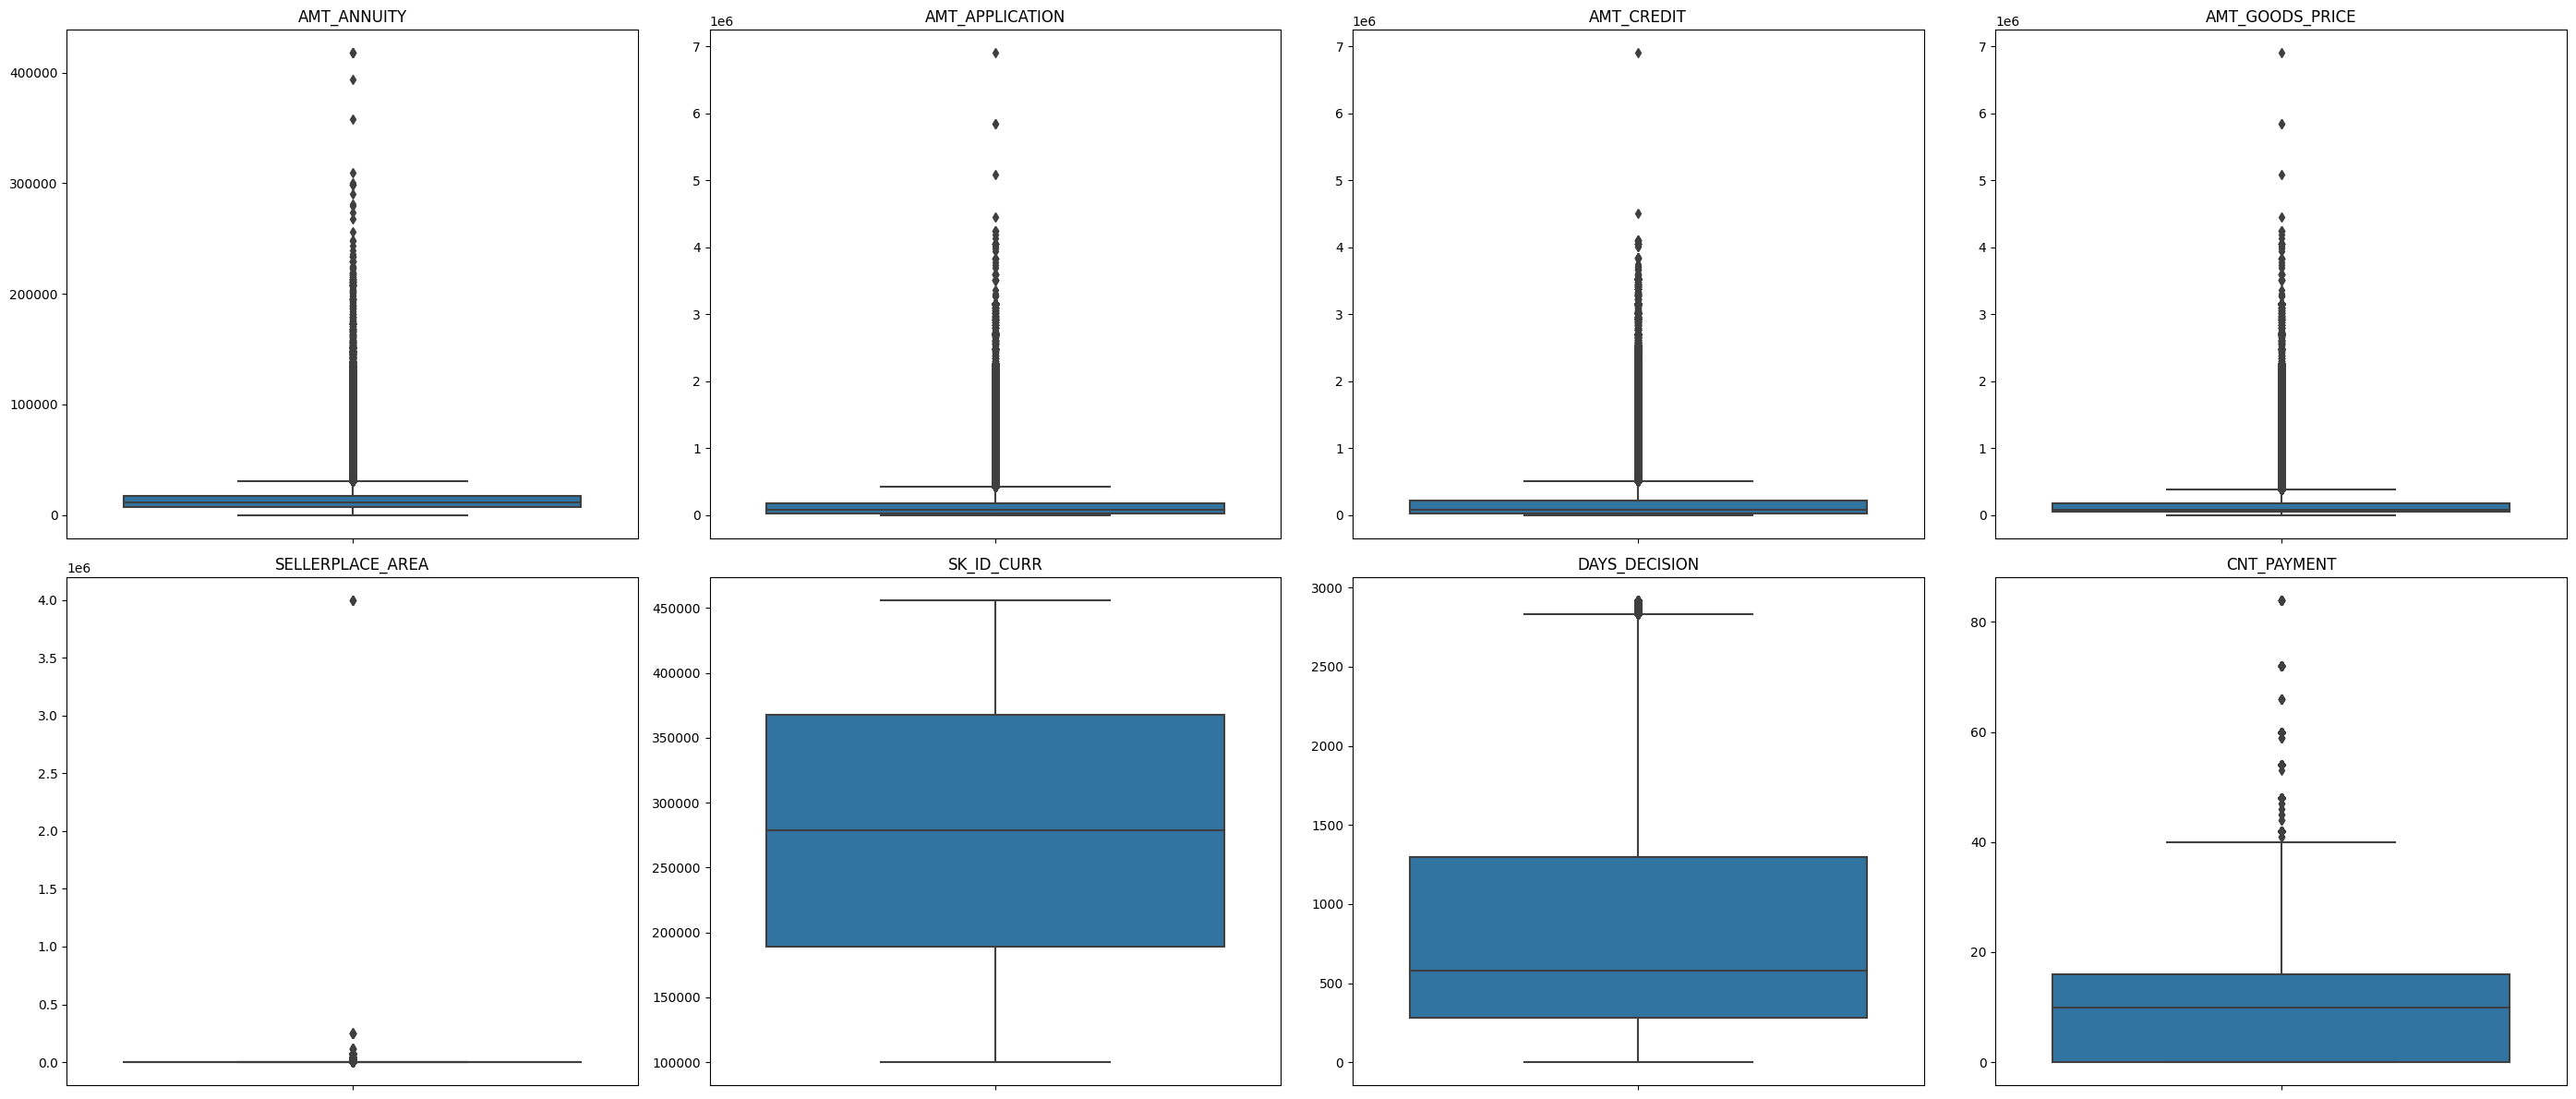

In [113]:
#finding the outliers for prev_df
#in order to find outliers we need to setup the loops to write the enumerate functions so that 
#it will be easy for the user to identify the outliers
plt.figure(figsize=(28,12))
#2 outliers for 2 columns are denoted for the featurence of data
prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
#1st loop for first outlier
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

#2nd loop for second outlier
for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev_df[i[1]])
    plt.title(i[1])
    plt.ylabel("") 
plt.tight_layout()

In [114]:
#outliers have been formed for both app_df and prev_df
prev_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


In [115]:
#outliers have been detected and the description of both the dataset after removing missing values and raw data had been cleared
#now our data is clean and ready to import
#final process i.e applying Data Analysis for smooth performance of our system
#and integrate the system for real time application use

In [116]:
#mainly foucs will be on
#whetheer there ia any imbalance in data
#categorical and numerical analysis

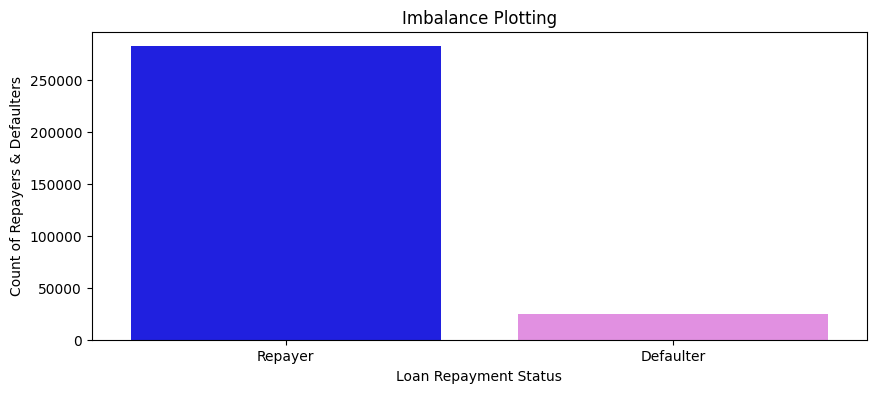

In [124]:
Imbalance = app_df["TARGET"].value_counts().reset_index()
Imbalance.columns = ['Loan Repayment Status', 'Count']

plt.figure(figsize=(10, 4))
sns.barplot(x='Loan Repayment Status', y='Count', data=Imbalance, palette=['blue', 'violet'])
plt.xticks(ticks=[0, 1], labels=['Repayer', 'Defaulter'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()


In [125]:
#go to know the status of ratio% of repayer and defaulter

In [127]:
# Calculating the imbalance percentages of applicationDF
count_0 = Imbalance.iloc[0]["Count"]
count_1 = Imbalance.iloc[1]["Count"]
count_0_perc = round(count_0 / (count_0 + count_1) * 100, 2)
count_1_perc = round(count_1 / (count_0 + count_1) * 100, 2)

print(f'Ratios of imbalance in percentage with respect to Repayer and Defaulter data are: {count_0_perc:.2f}% and {count_1_perc:.2f}%')
print(f'Ratios of imbalance in relative terms with respect to Repayer and Defaulter data is {count_0 / count_1:.2f} : 1 (approx)')


Ratios of imbalance in percentage with respect to Repayer and Defaulter data are: 91.93% and 8.07%
Ratios of imbalance in relative terms with respect to Repayer and Defaulter data is 11.39 : 1 (approx)


In [129]:
#now we create the univariate and bivariate analysis for categorical value function
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app_dF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    #this plots the values with respect to target variable that needs to be acchieved

    # Calculate the percentage of target=1 per category value
    cat_perc = app_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))


    s = sns.countplot(ax=ax1, x = feature, data=app_df,hue ="TARGET",order=cat_perc[feature],palette=['g','r'])
    #creating countplot for the categorical column
     # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    #this analysis till now was done if layout was preesent
#now if layout is not present in the data
     # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    #Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,x = feature,y='TARGET',order=cat_perc[feature], data=cat_perc,palette='Set2')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.show()


In [130]:
#now bivariate analysis for the categorical column in app_df

def bivariate_bar(x,y,df,hue,figsize):
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df,hue=hue,palette =['g','r'])
     
# Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [133]:
#now we perform the numerical analysis for the application df
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x,y=y,data=app_df,hue="TARGET",kind=kind,palette = ['g','r'],legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [134]:
#now we merge the dataset and perform the univariate analysis ro know about the performance between repayer and defaulter
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col,data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [135]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x,y=y,hue="TARGET",data=loan_process_df,palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

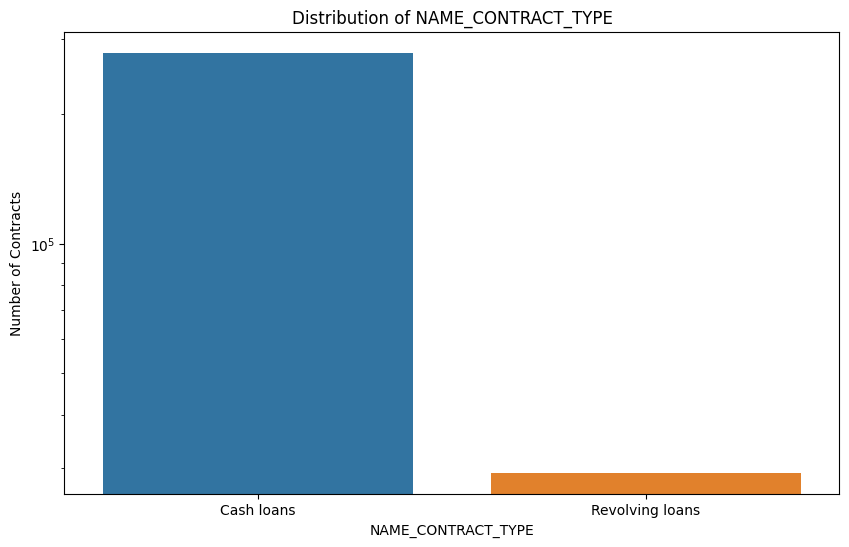

In [138]:
def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = app_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Number of contracts', data=df1)
    
    if label_rotation:
        plt.xticks(rotation=45)
    
    if ylog:
        plt.yscale('log')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Contracts')
    plt.show()

# Usage example:
univariate_categorical('NAME_CONTRACT_TYPE', ylog=True)

In [139]:
#finally got the access of data% of cash and revolve loan
#cash loan: a type of personal loan where he need to pay fix amount of interest
#revolve loan: a type of loan where user has the capability to spend more than line of credit
#eg: user b has revolve loan of 5l he has the ability to spend or take more than 5l

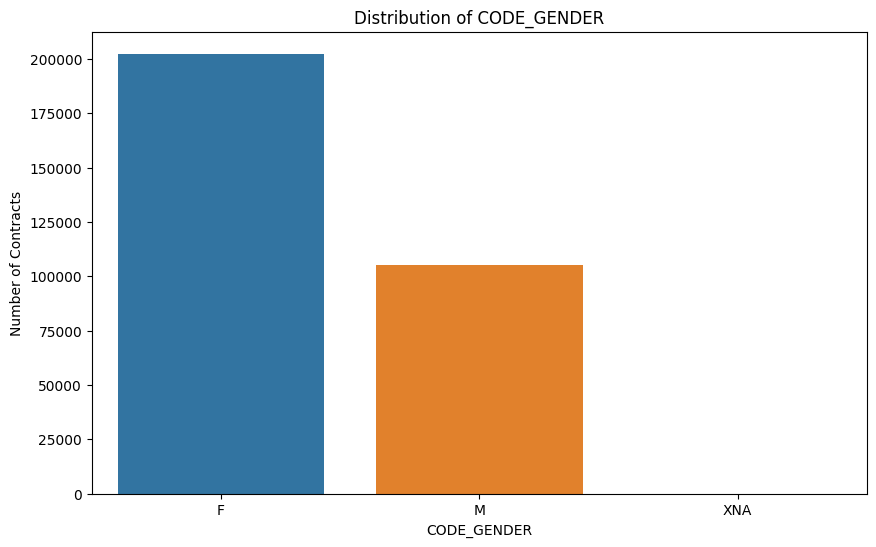

In [140]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

In [141]:
#therfore compartively females have more repayment status of loan than men

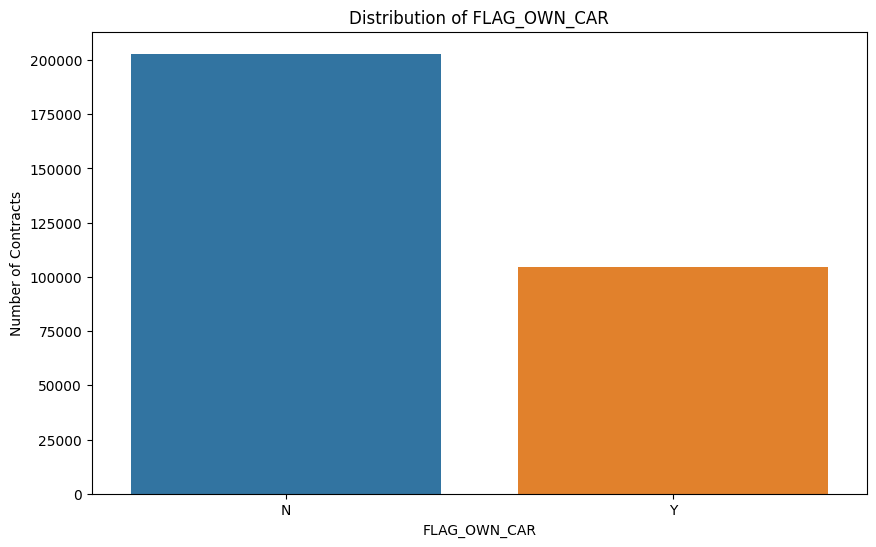

In [142]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

In [143]:
#Clients who own a car are half in number of the clients who dont own a car. 

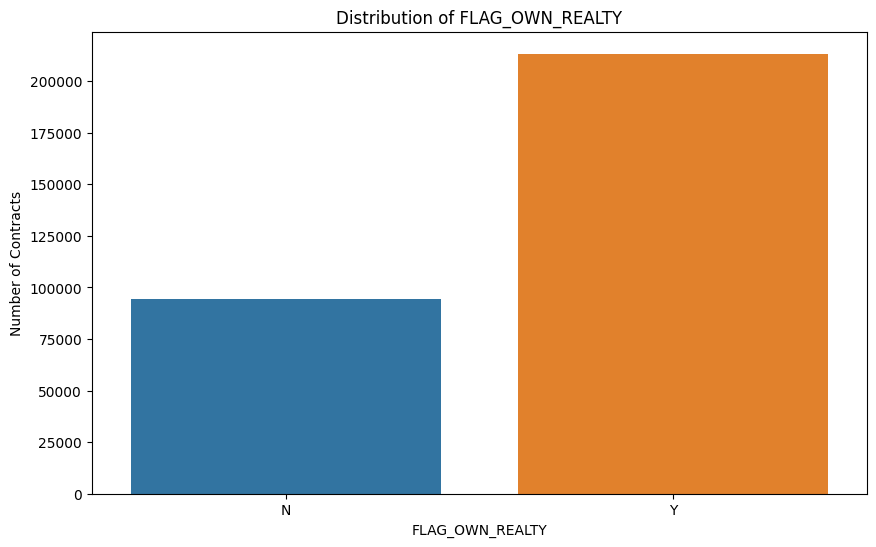

In [144]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

In [145]:
#The clients who own real estate are more than double of the ones that don't own.

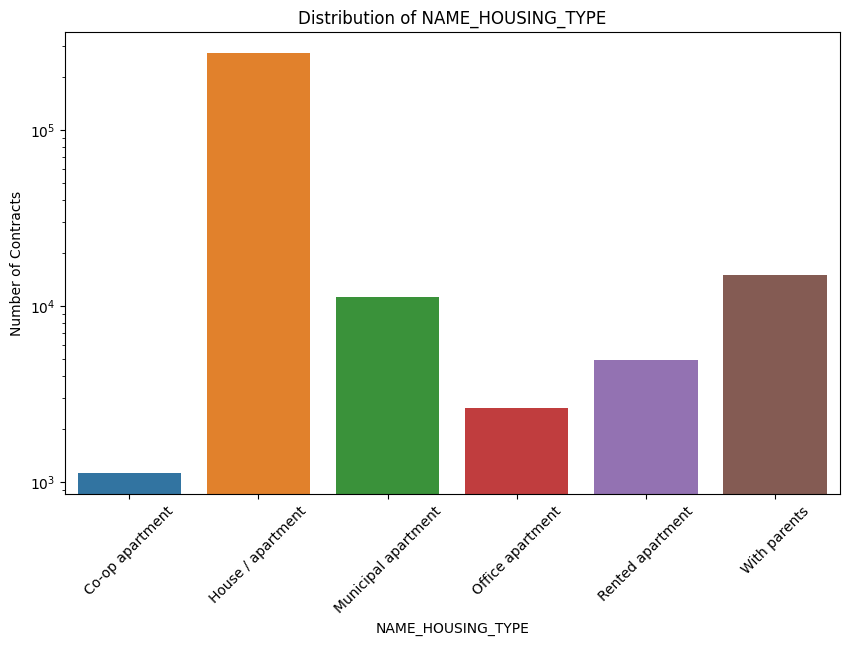

In [146]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

In [147]:
'''
Majority of people live in House/apartment
People living in office apartments have lowest default rate
People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting
'''

'\nMajority of people live in House/apartment\nPeople living in office apartments have lowest default rate\nPeople living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting\n'

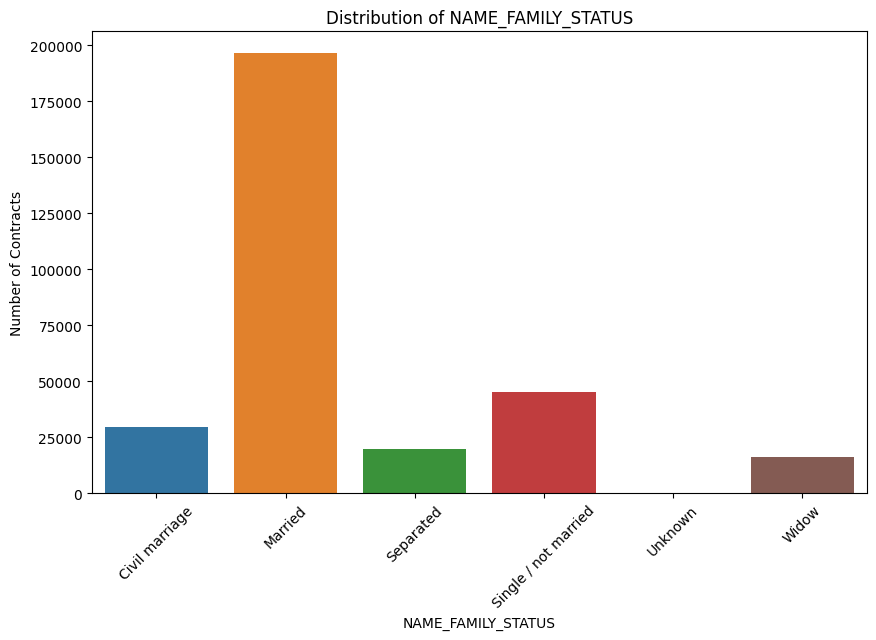

In [148]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

In [149]:
#Most of the people who have taken loan are married, followed by Single/not married and civil marriage

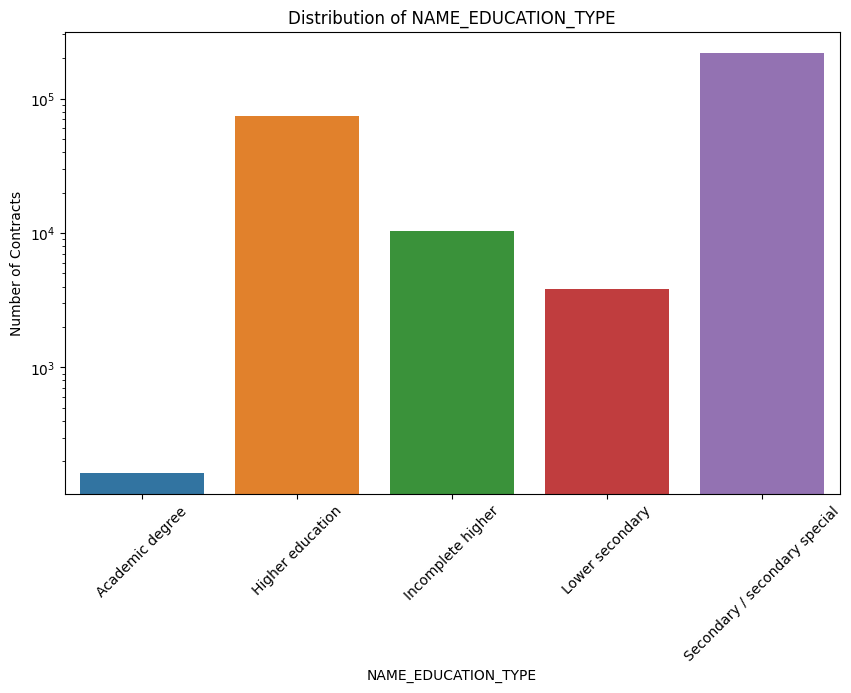

In [150]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

In [151]:
#Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree

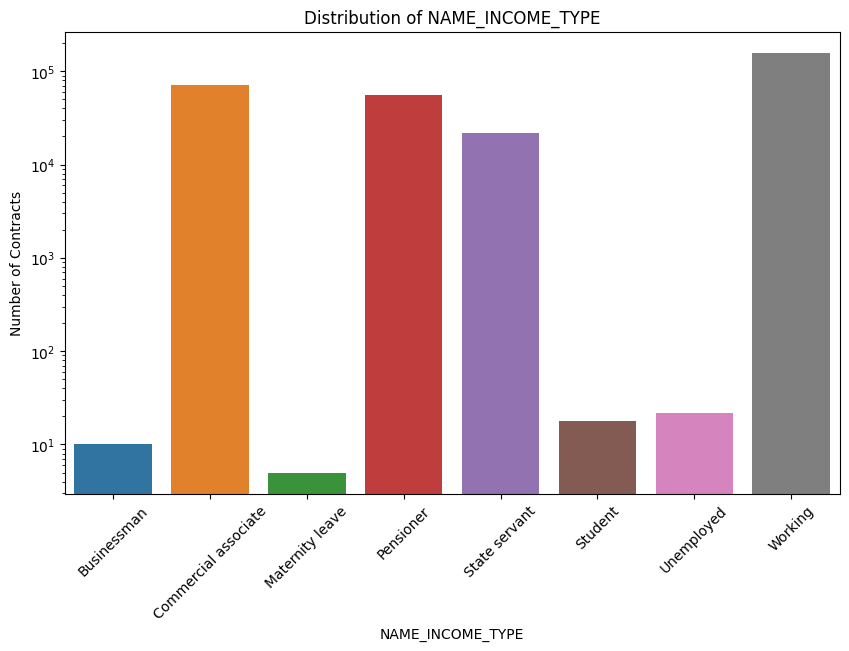

In [152]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

In [153]:
#Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.

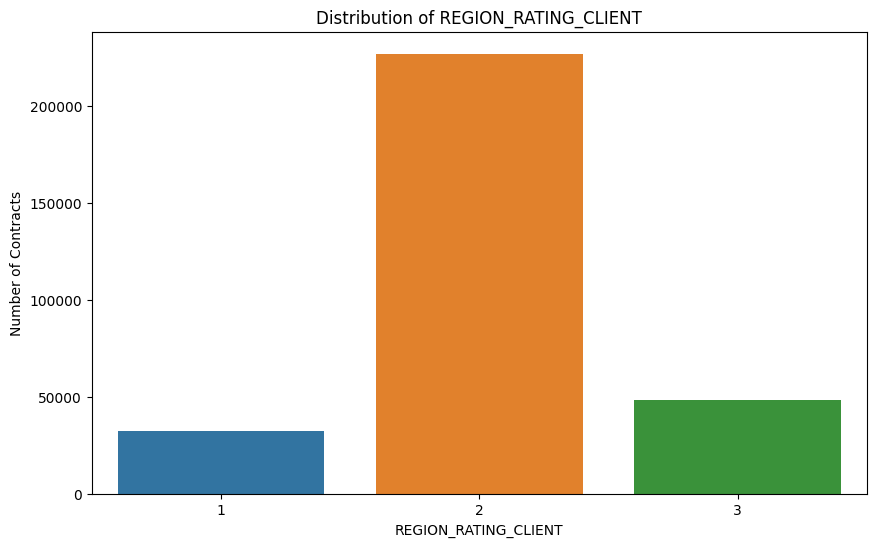

In [154]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

In [155]:
'''
Most of the applicants are living in Region_Rating 2 place.
Region Rating 3 has the highest default rate (11%)
Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans
'''

'\nMost of the applicants are living in Region_Rating 2 place.\nRegion Rating 3 has the highest default rate (11%)\nApplicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans\n'

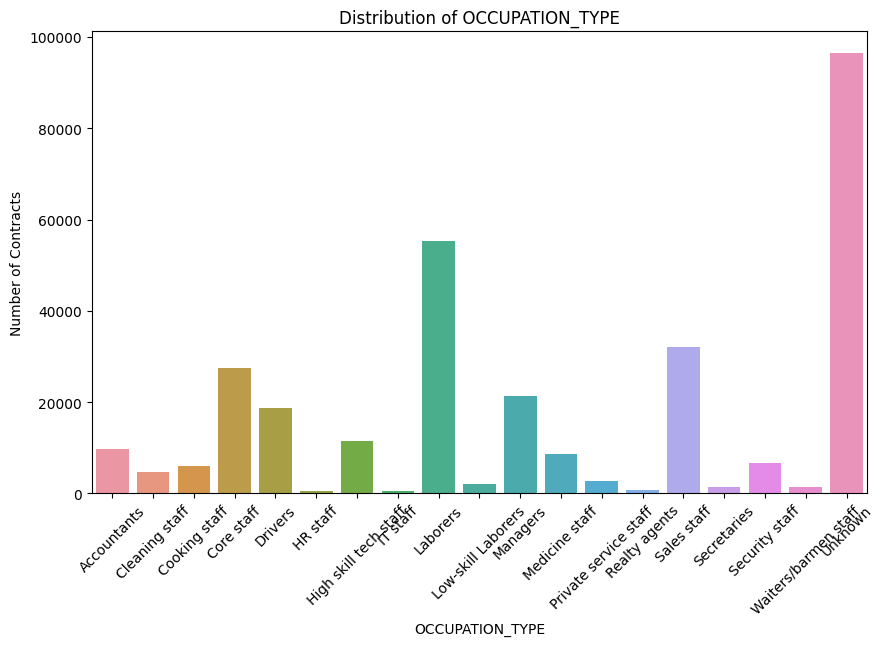

In [156]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

In [157]:
#Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

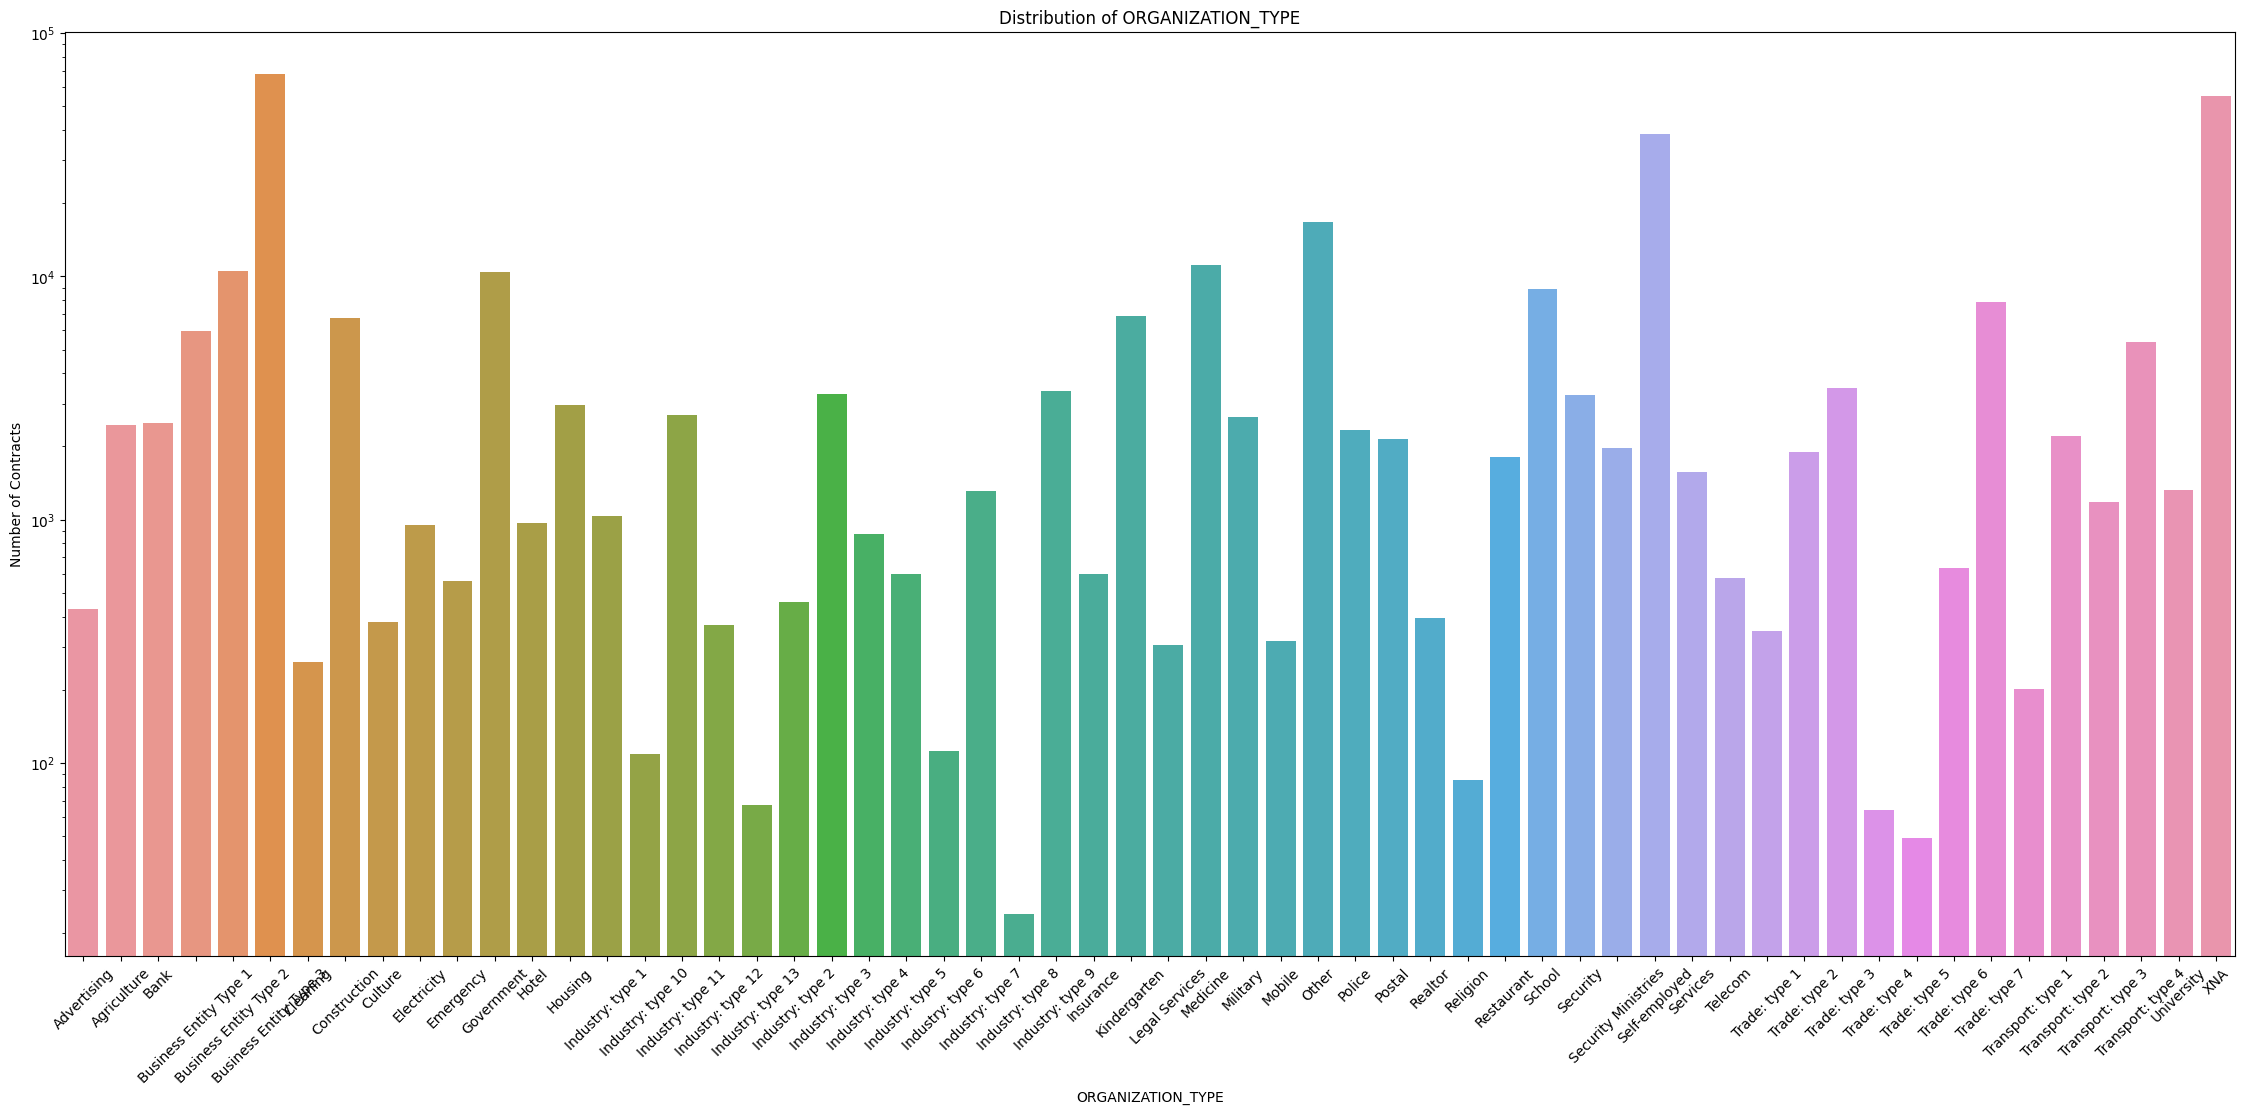

In [159]:
def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = app_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    plt.figure(figsize=(28, 12))  # Adjust the size as needed
    sns.barplot(x=feature, y='Number of contracts', data=df1)
    
    if label_rotation:
        plt.xticks(rotation=45)
    
    if ylog:
        plt.yscale('log')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Contracts')
    plt.show()

# Usage example:
univariate_categorical("ORGANIZATION_TYPE", True, True, False)

In [160]:
'''
Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and 
Restaurant (less than 12%). Self employed people have relative high defaulting rate, 
and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
'''

'\nOrganizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and \nRestaurant (less than 12%). Self employed people have relative high defaulting rate, \nand thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.\n'

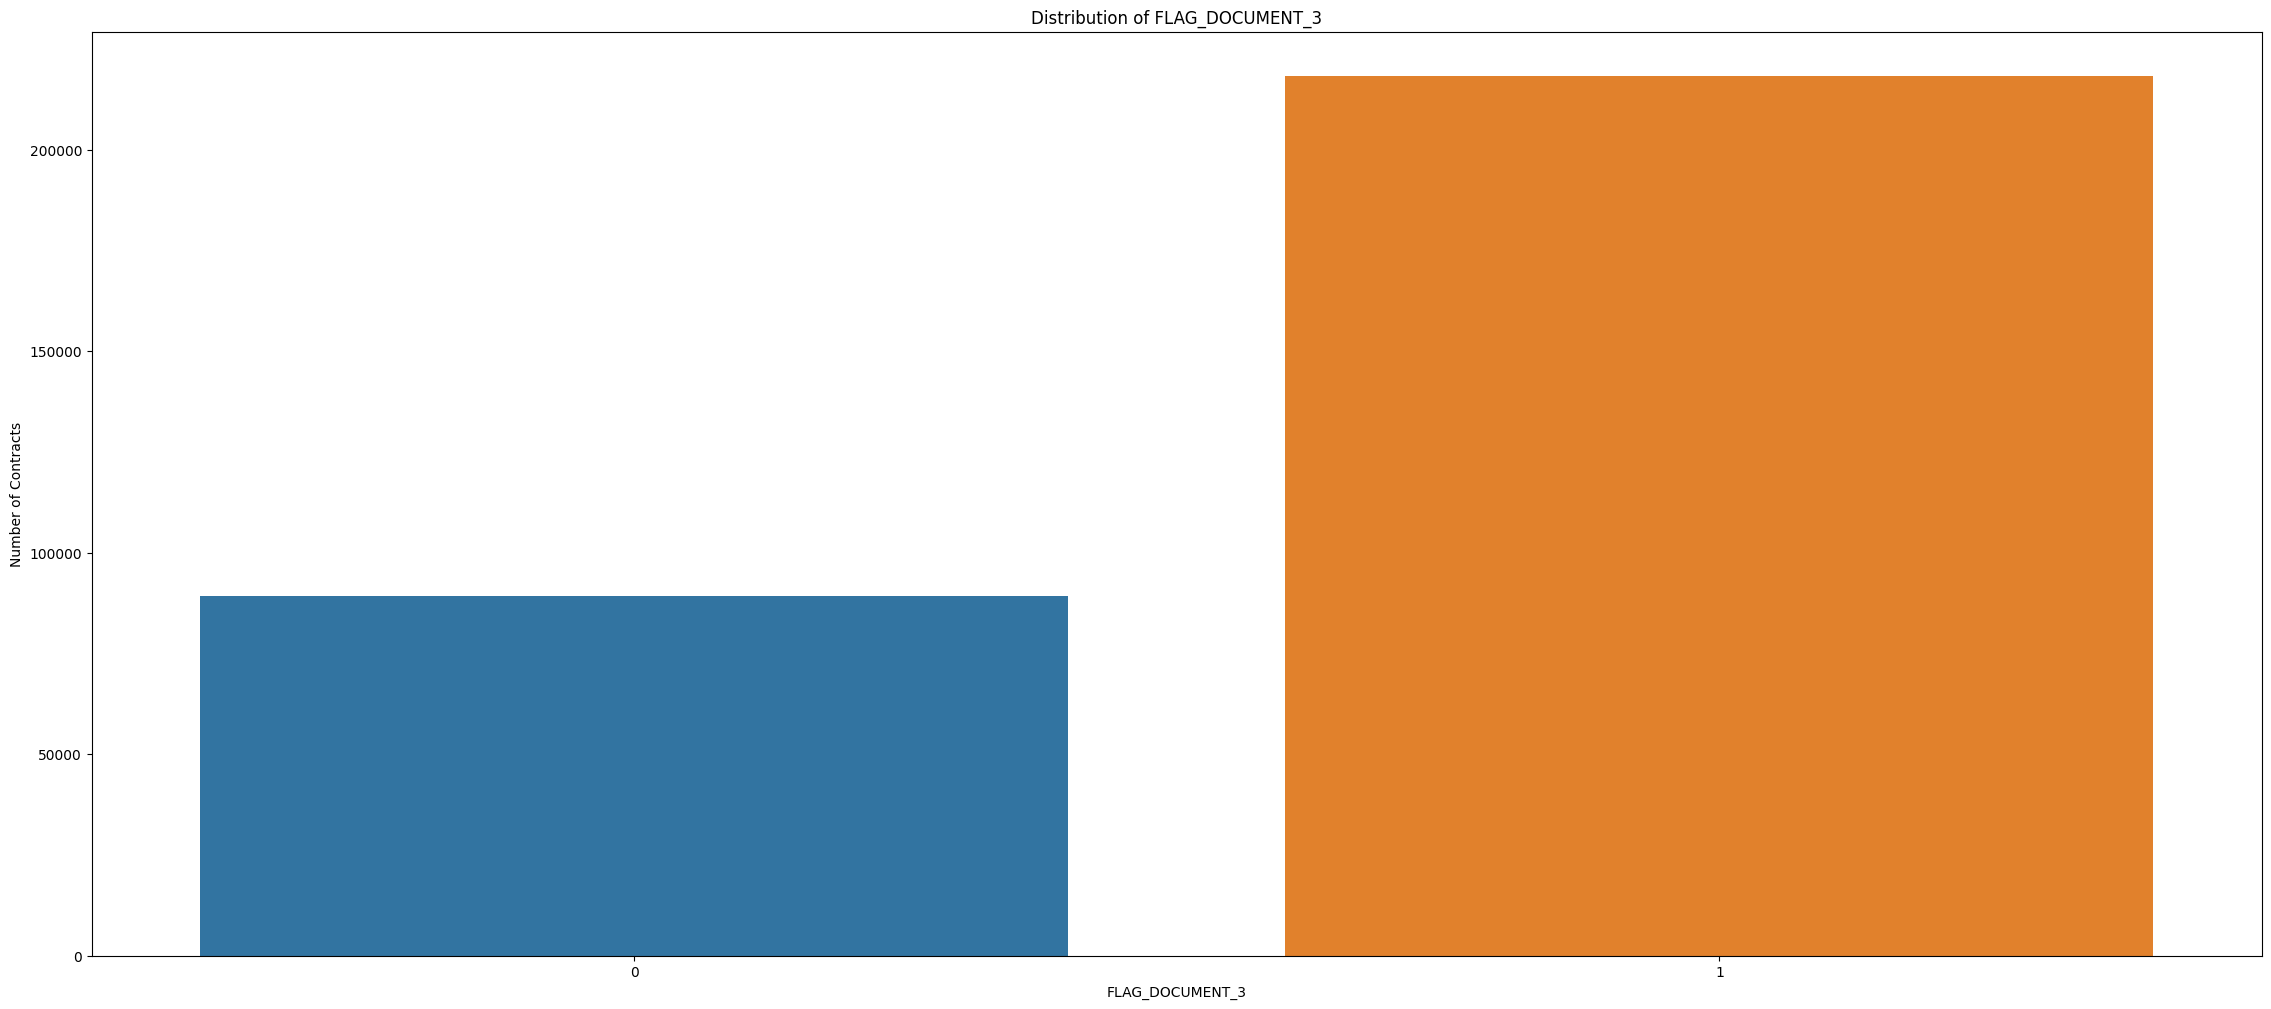

In [161]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

In [162]:
#There is no significant correlation between repayers and defaulters in terms of submitting document 3

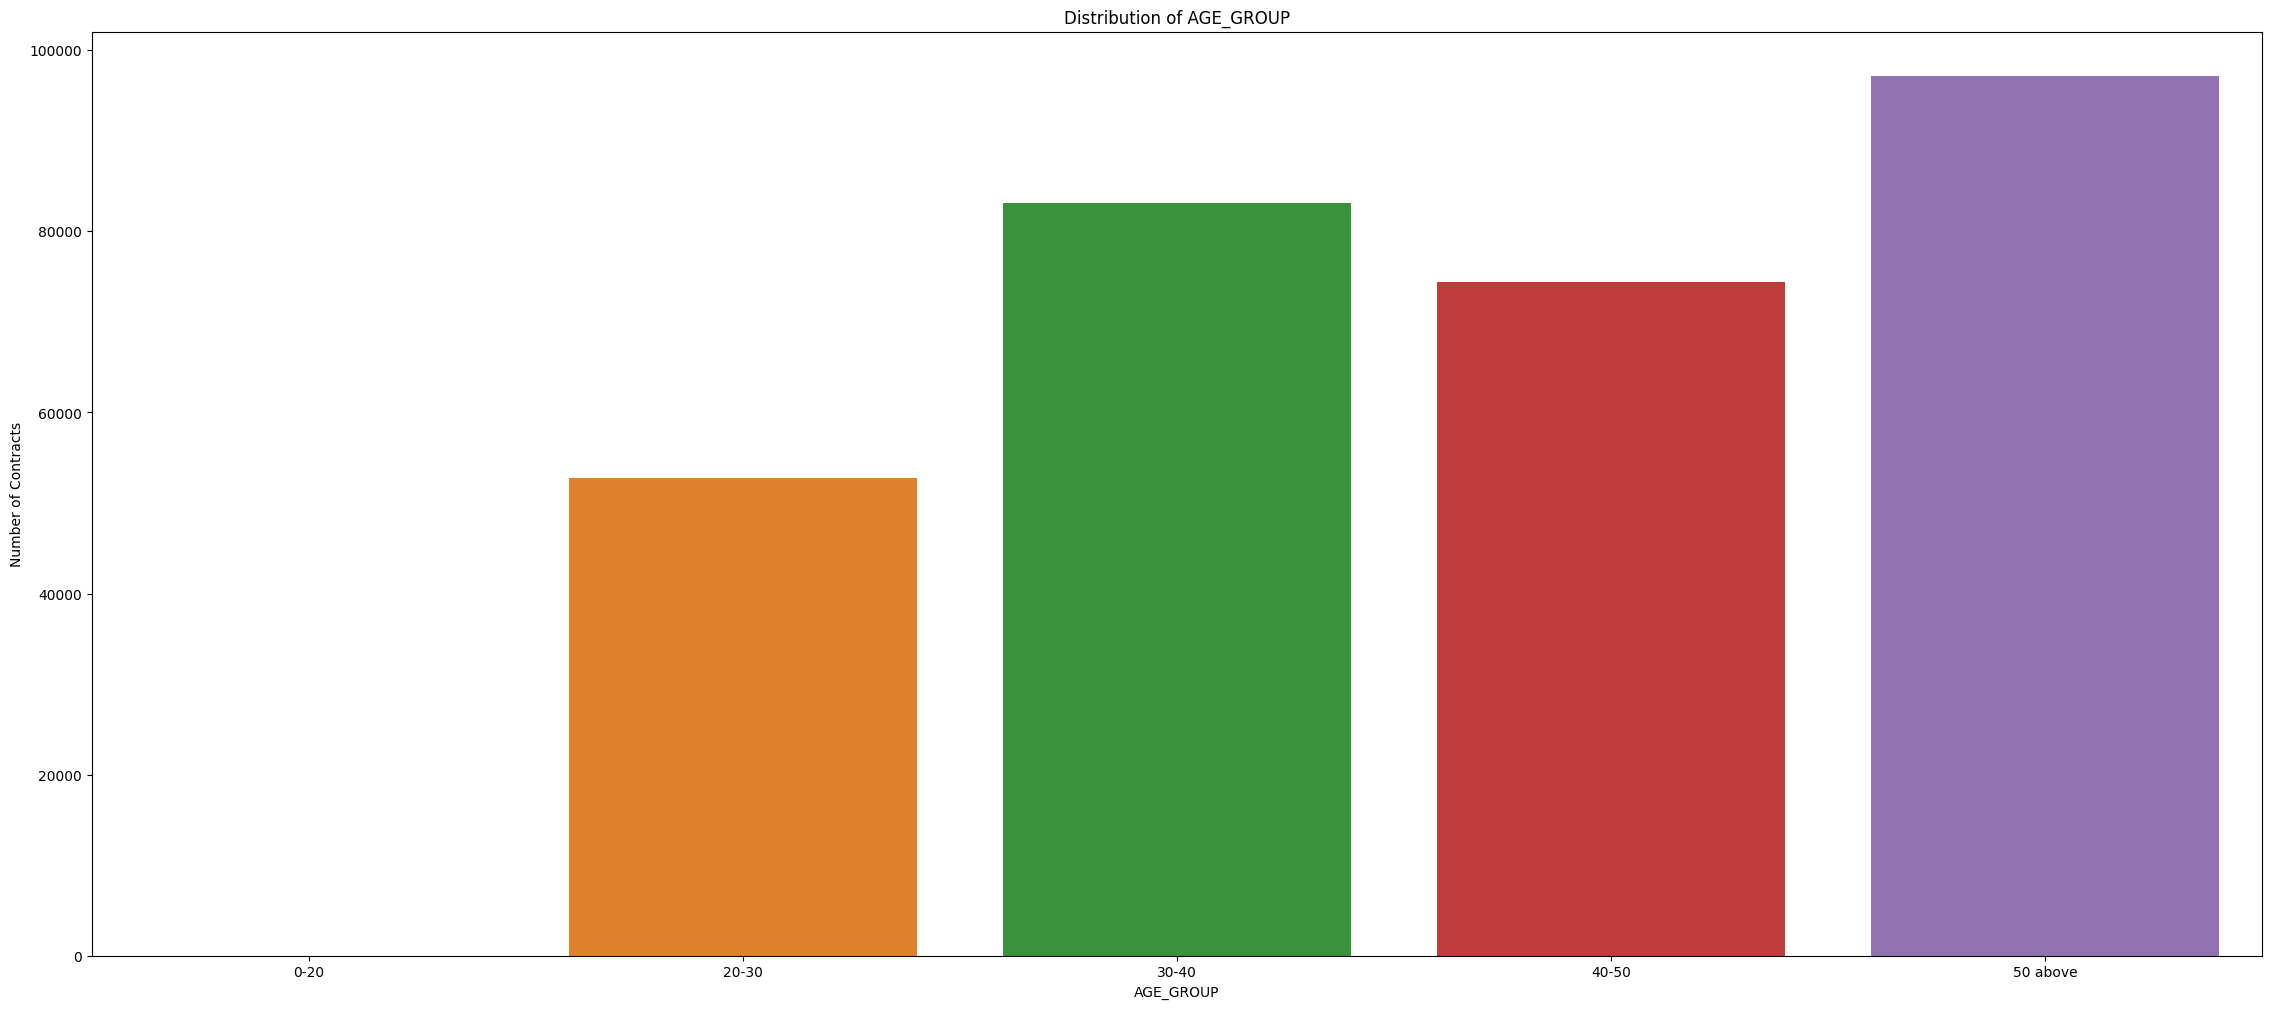

In [163]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

In [164]:
#People in the age group range 20-40 have higher probability of defaulting

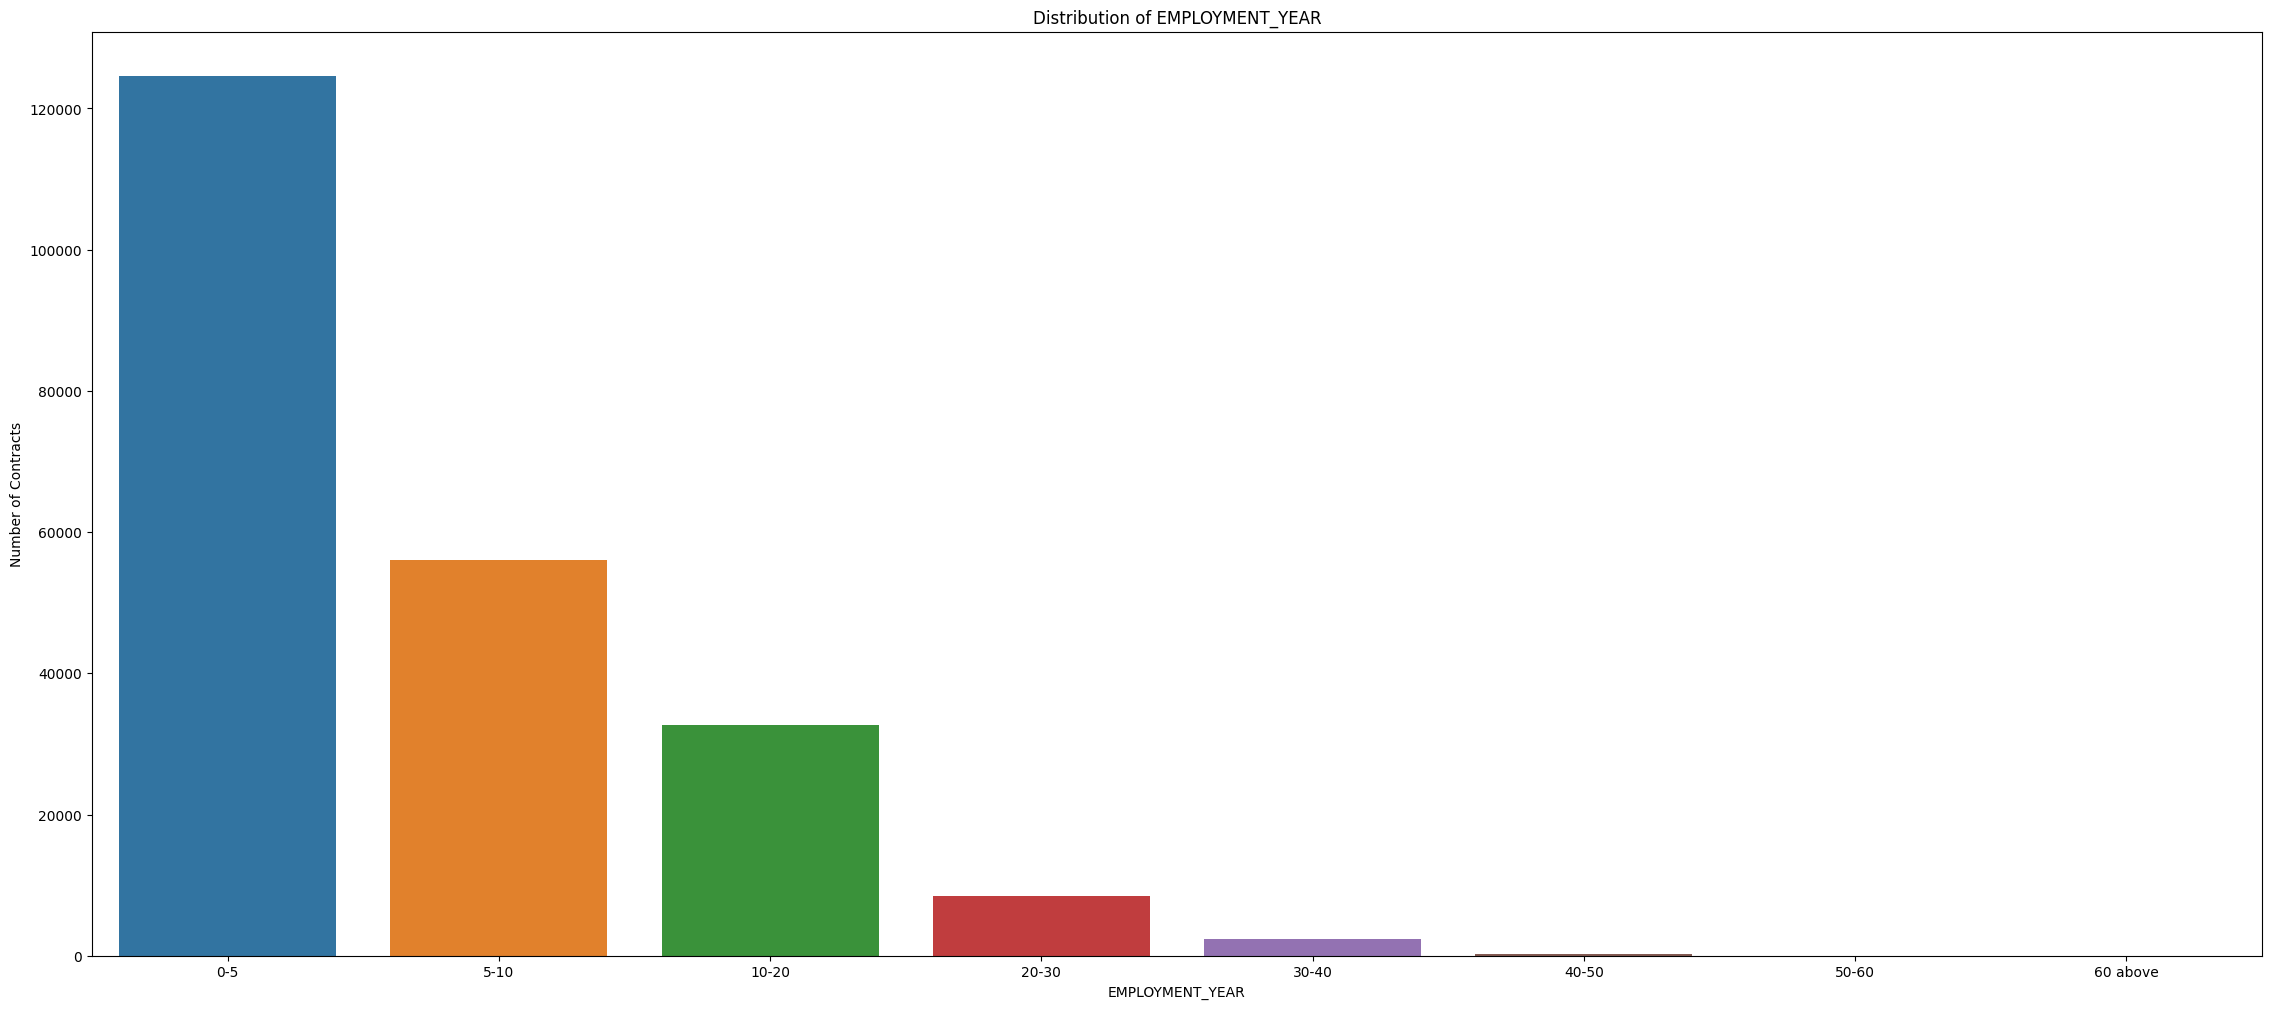

In [165]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

In [166]:
#Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%

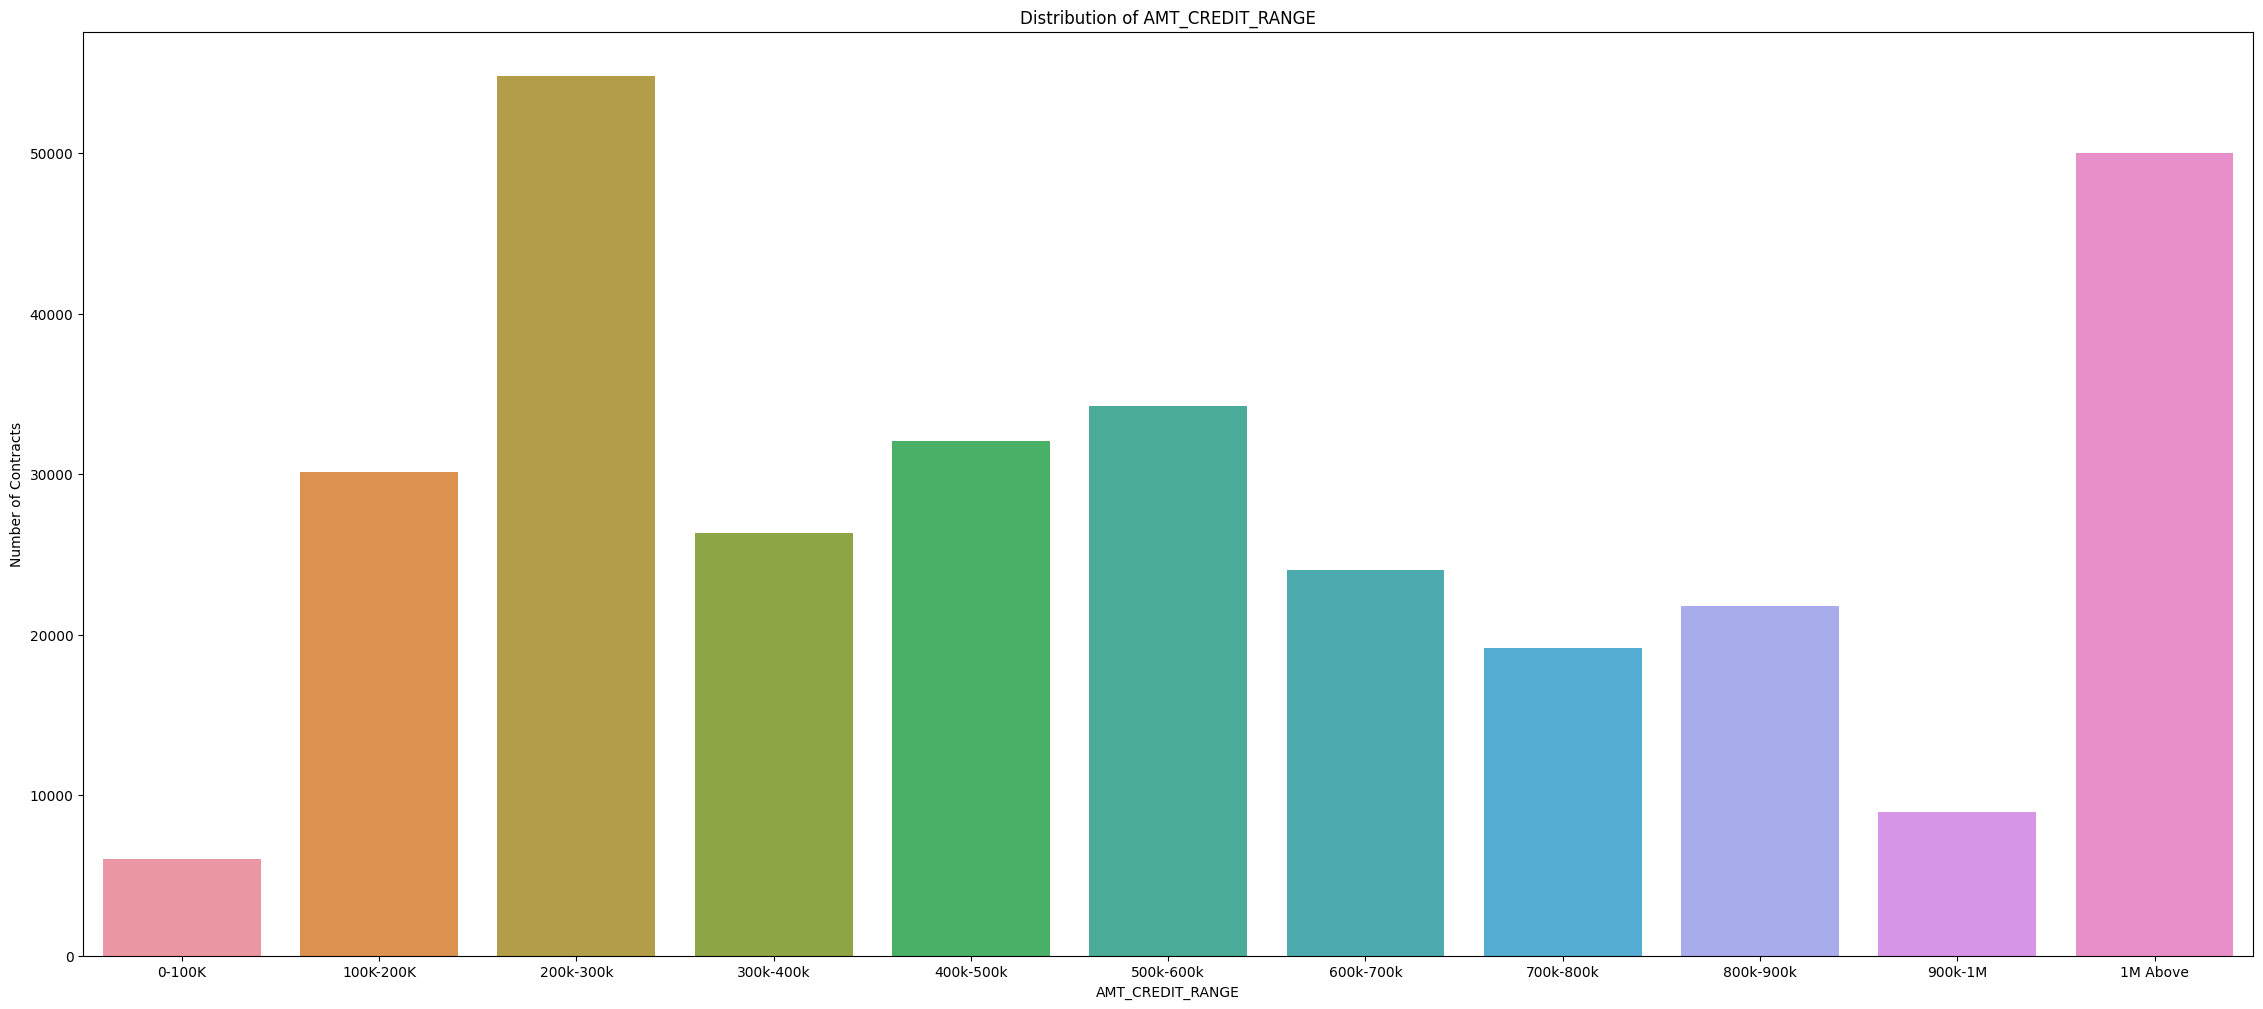

In [167]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

In [168]:
#More than 80% of the loan provided are for amount less than 900,000

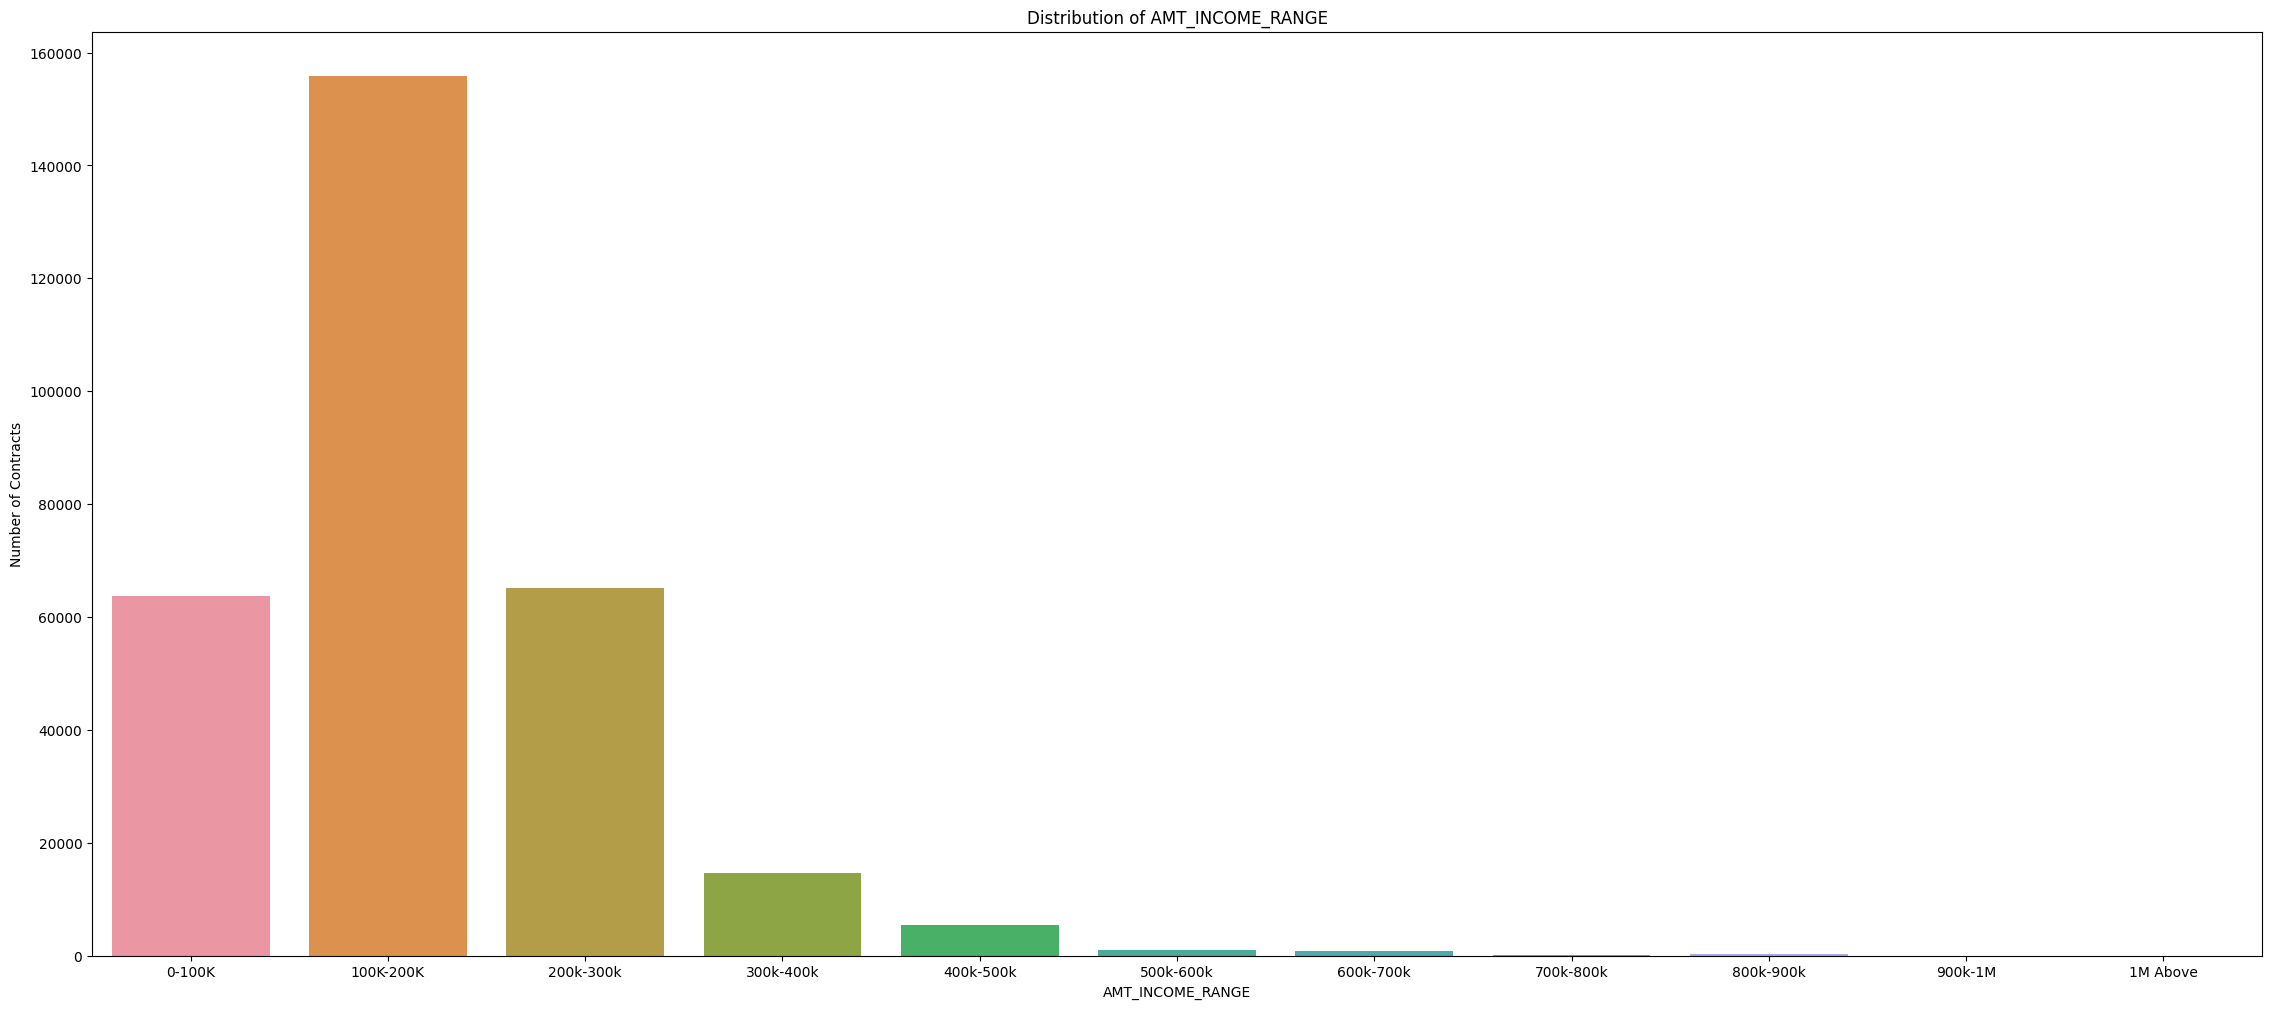

In [169]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

In [170]:
'''
90% of the applications have Income total less than 300,000
Application with Income less than 300,000 has high probability of defaulting
'''

'\n90% of the applications have Income total less than 300,000\nApplication with Income less than 300,000 has high probability of defaulting\n'

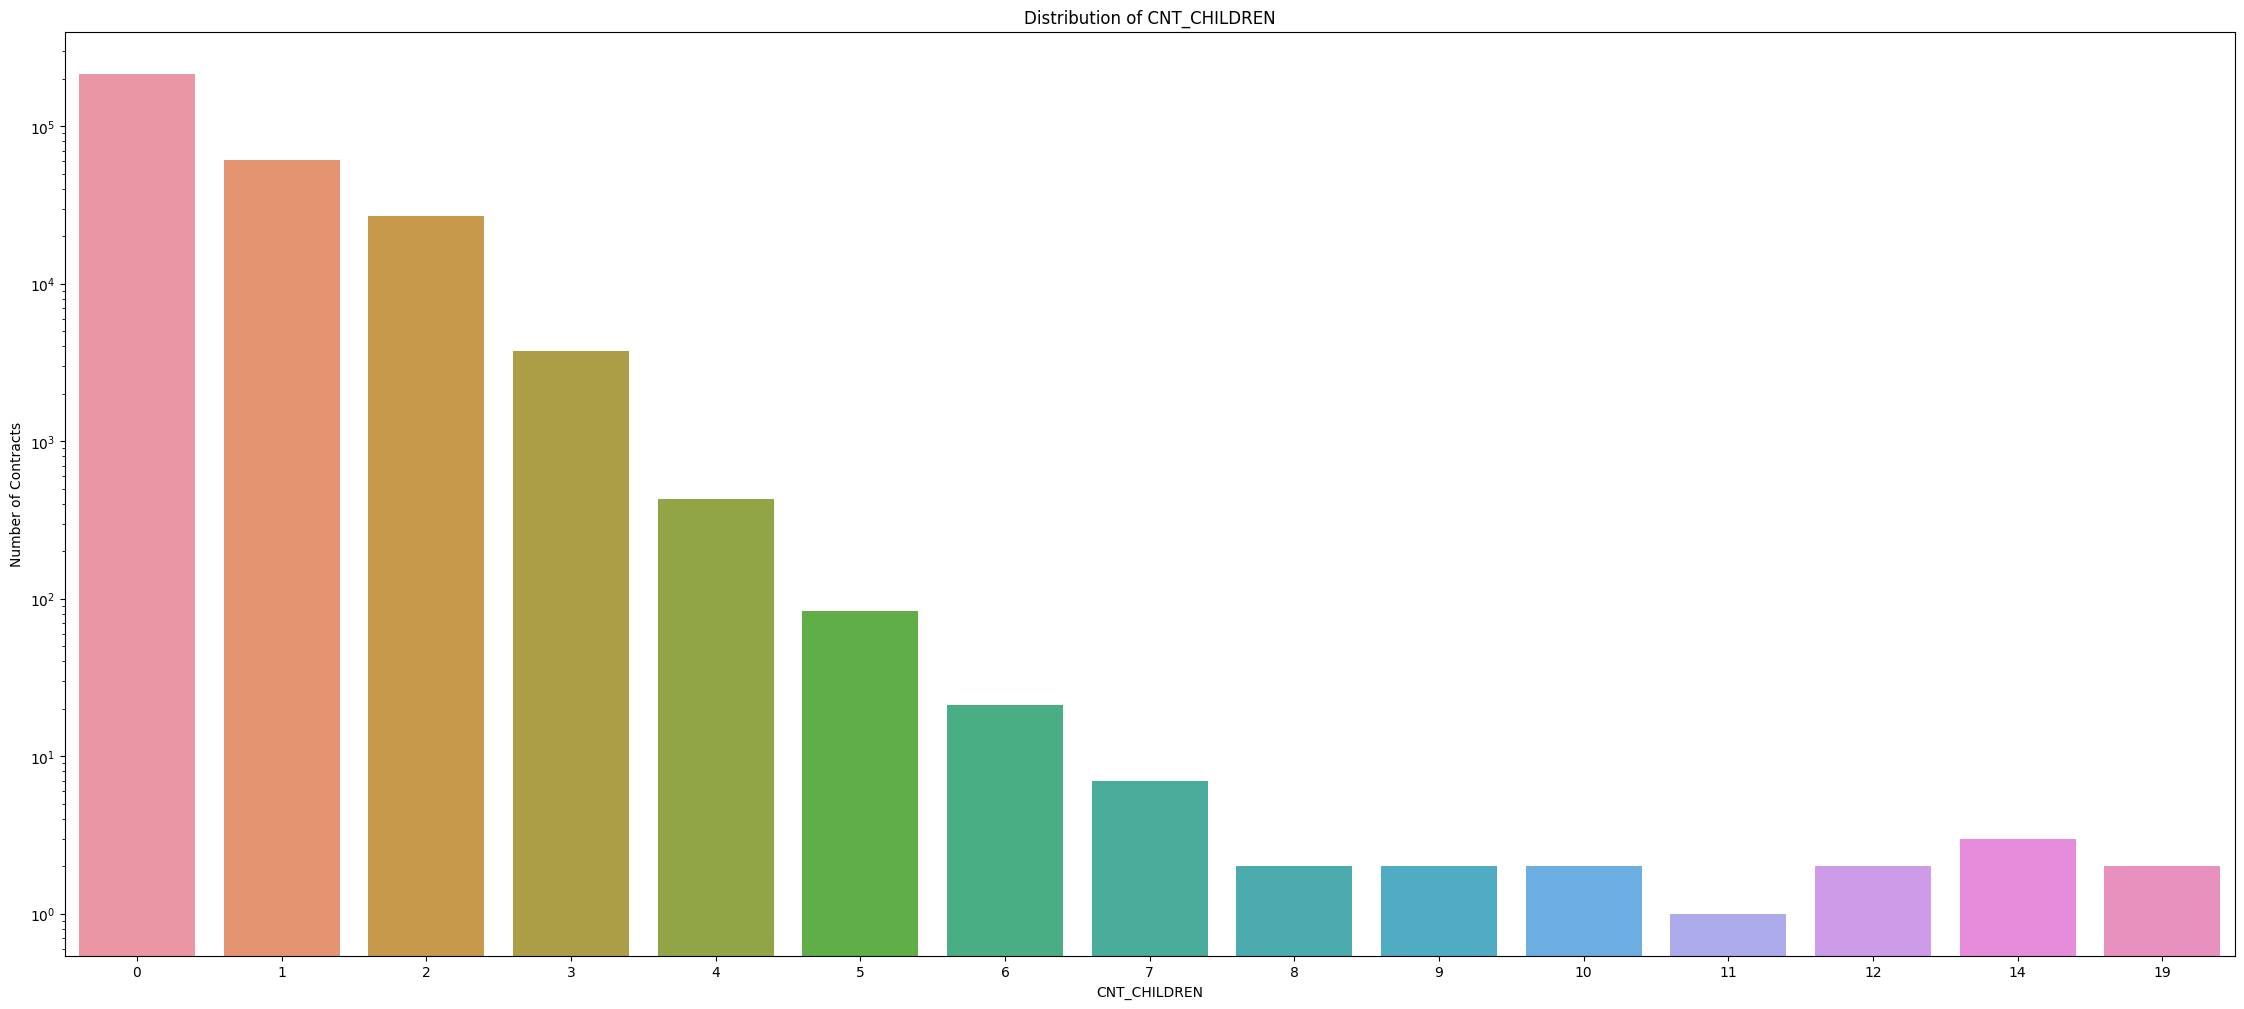

In [171]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

In [173]:
#Most of the applicants do not have children
#Very few clients have more than 3 children.

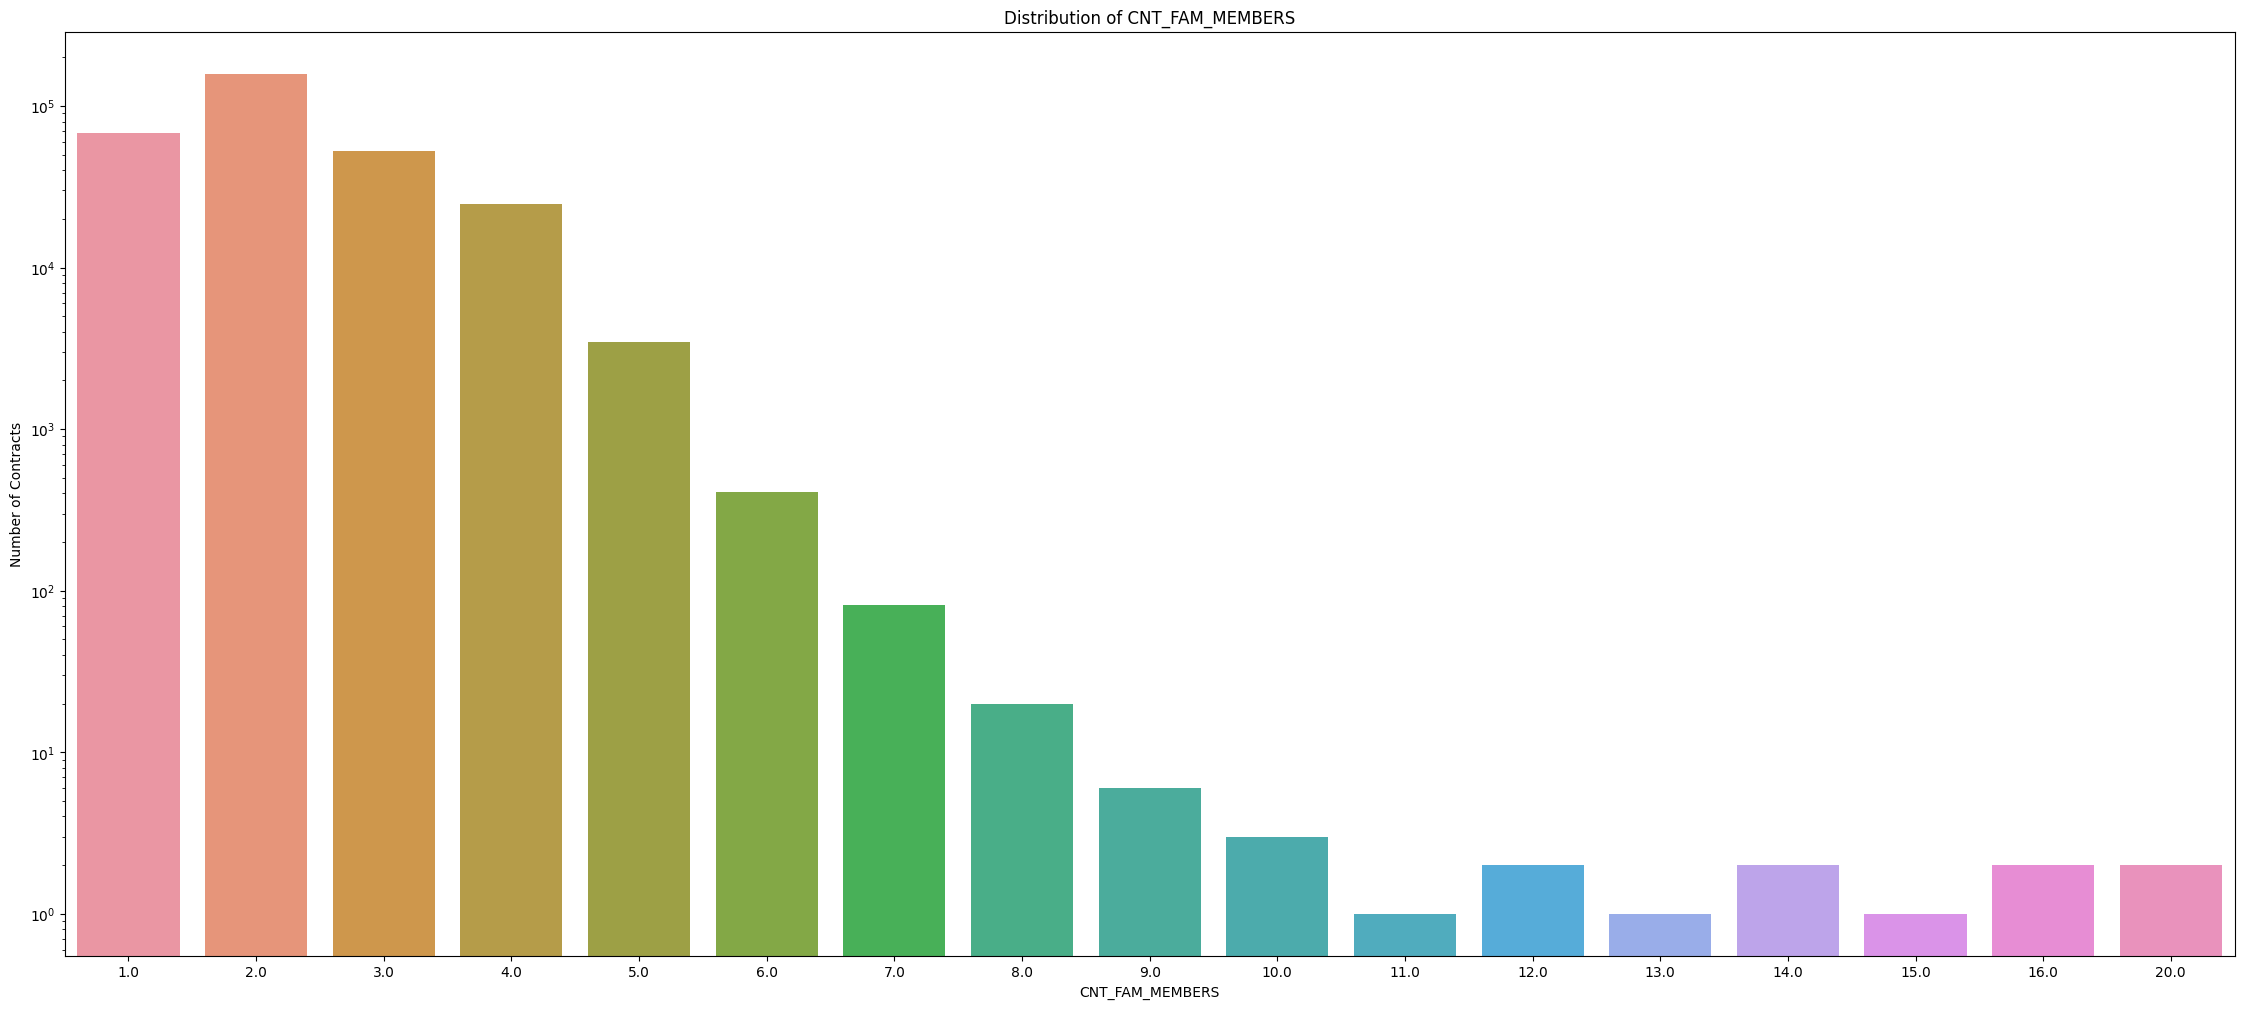

In [174]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

In [175]:
#Family member follows the same trend as children where having more family members increases the risk of defaulting

In [176]:
#data nalaysis of each and every component is done
#now only need to post the updated data in the required dataforms

In [177]:
#categorical/multivariate combinational anlaysis for updated data
app_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


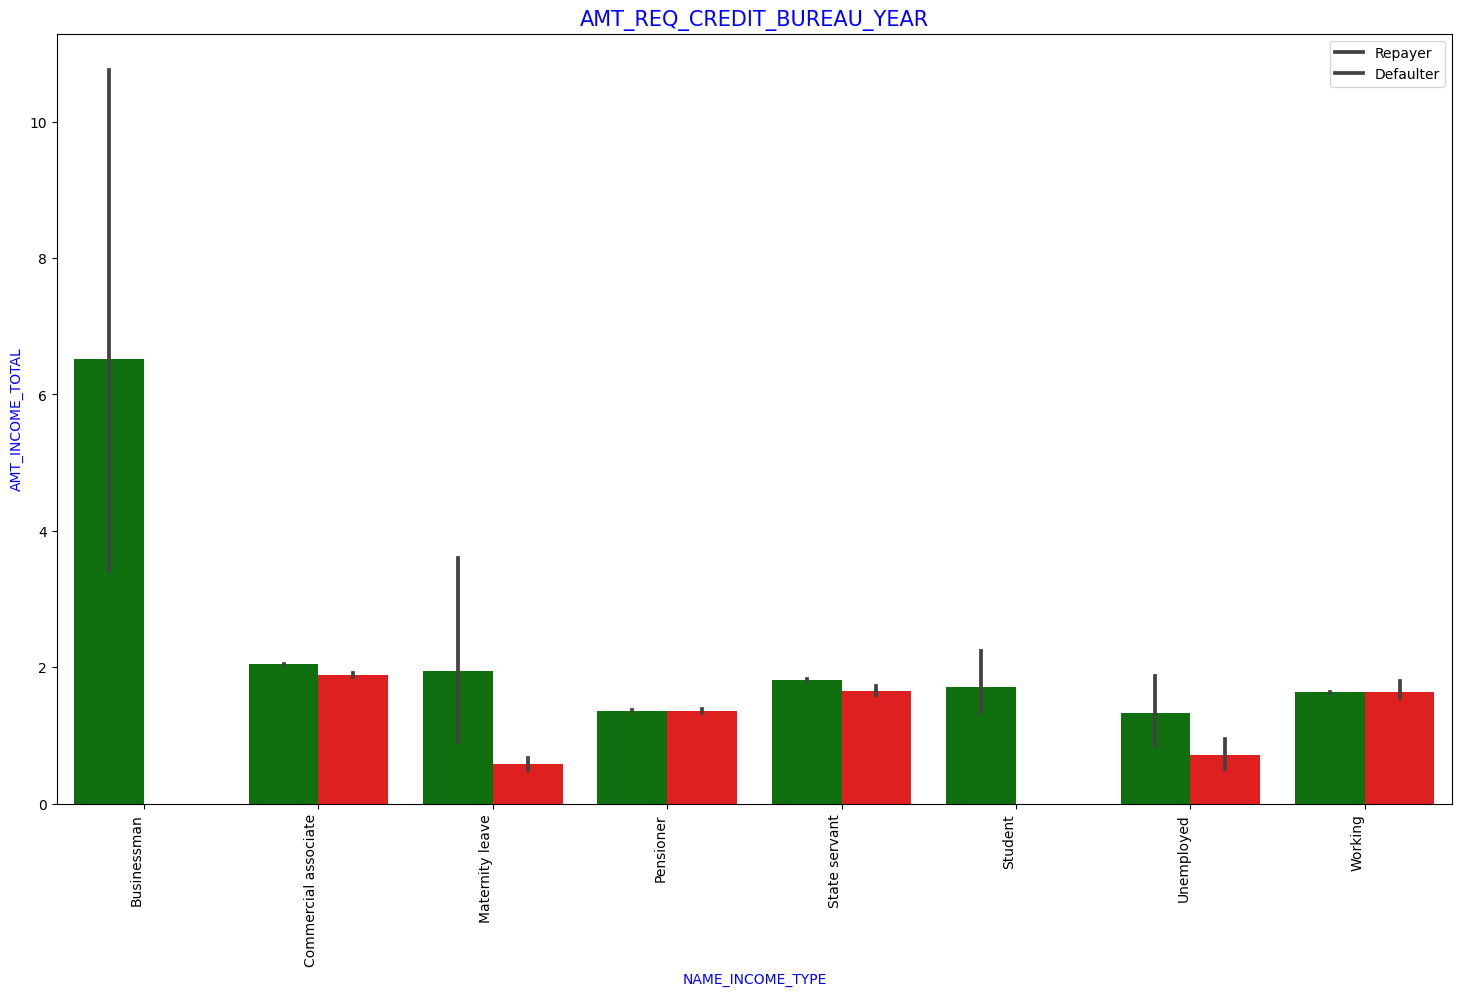

In [179]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app_df,"TARGET",(18,10))

In [180]:
'''
they can be seen that business man's income is the highest.
and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to,
4 lakhs and slightly above 10 lakhs.
'''

"\nthey can be seen that business man's income is the highest.\nand the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to,\n4 lakhs and slightly above 10 lakhs.\n"

In [181]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT

In [184]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Repayer_df = app_df.loc[app_df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = app_df.loc[app_df['TARGET']==1, cols_for_correlation] # Defaulters
#using the repayer ad defaulter data for correkation analysis for the updated data


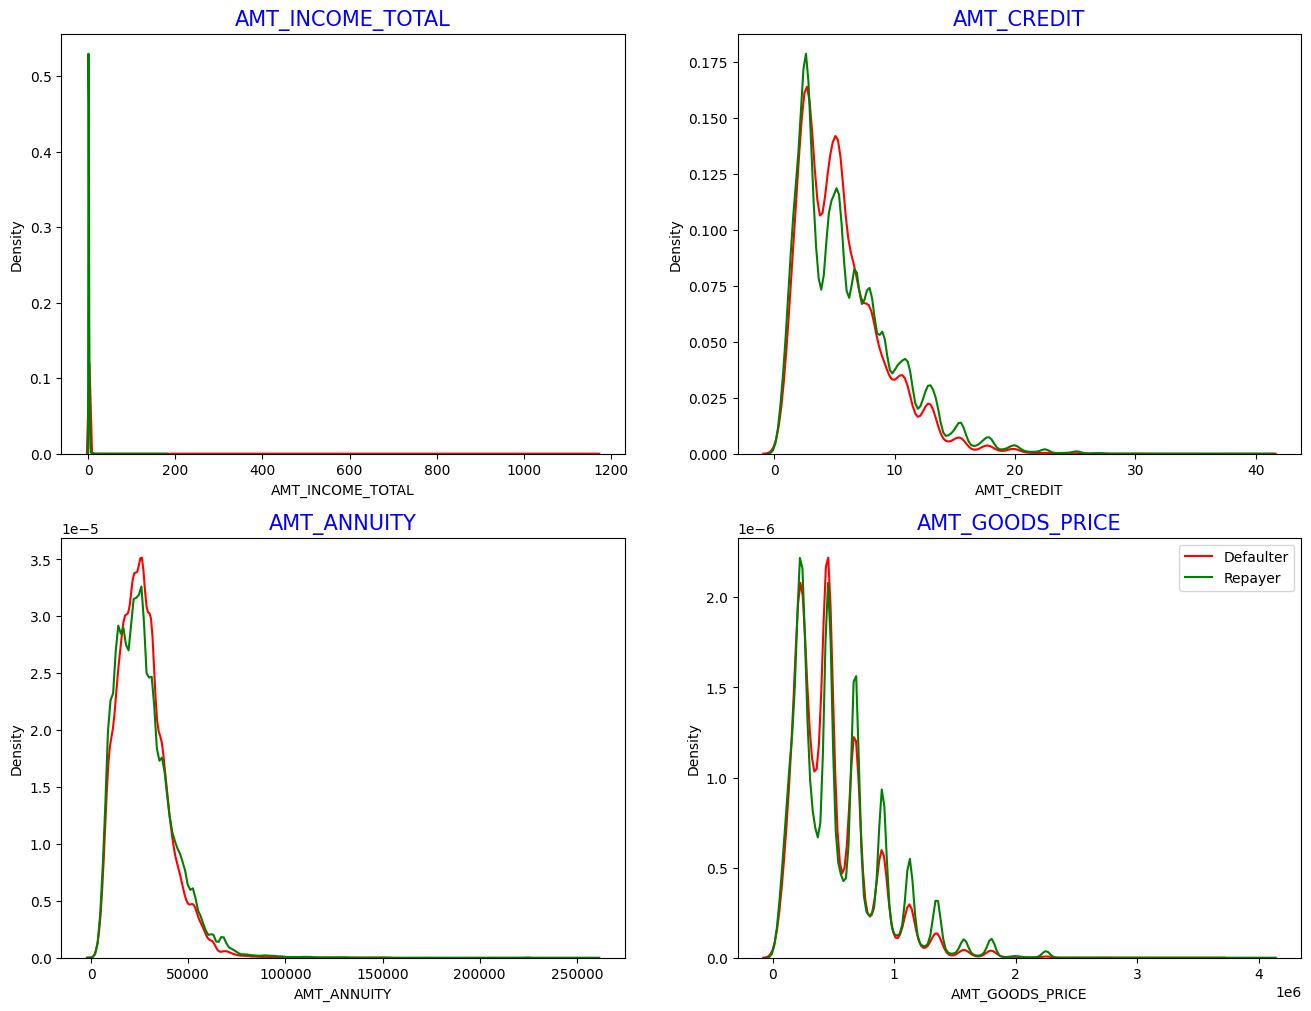

In [186]:
#categorical univariate analysis completed
#now numerical univariate analysis
# Plotting the numerical columns related to amount as distribution plot to see density
amount = app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

In [187]:
'''
Most no of loans are given for goods price below 10 lakhs
Most people pay annuity below 50000 for the credit loan
Credit amount of the loan is mostly less then 10 lakhs
'''

'\nMost no of loans are given for goods price below 10 lakhs\nMost people pay annuity below 50000 for the credit loan\nCredit amount of the loan is mostly less then 10 lakhs\n'

<Figure size 1500x600 with 0 Axes>

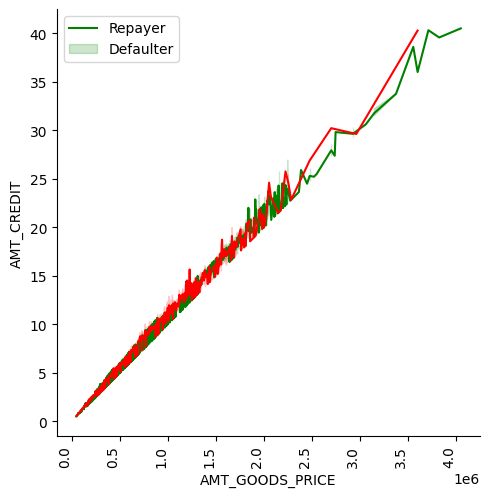

In [188]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',app_df,"TARGET", "line", ['g','r'], False,(15,6))

In [189]:
#When the credit amount goes beyond 3M, there is an increase in defaulters.

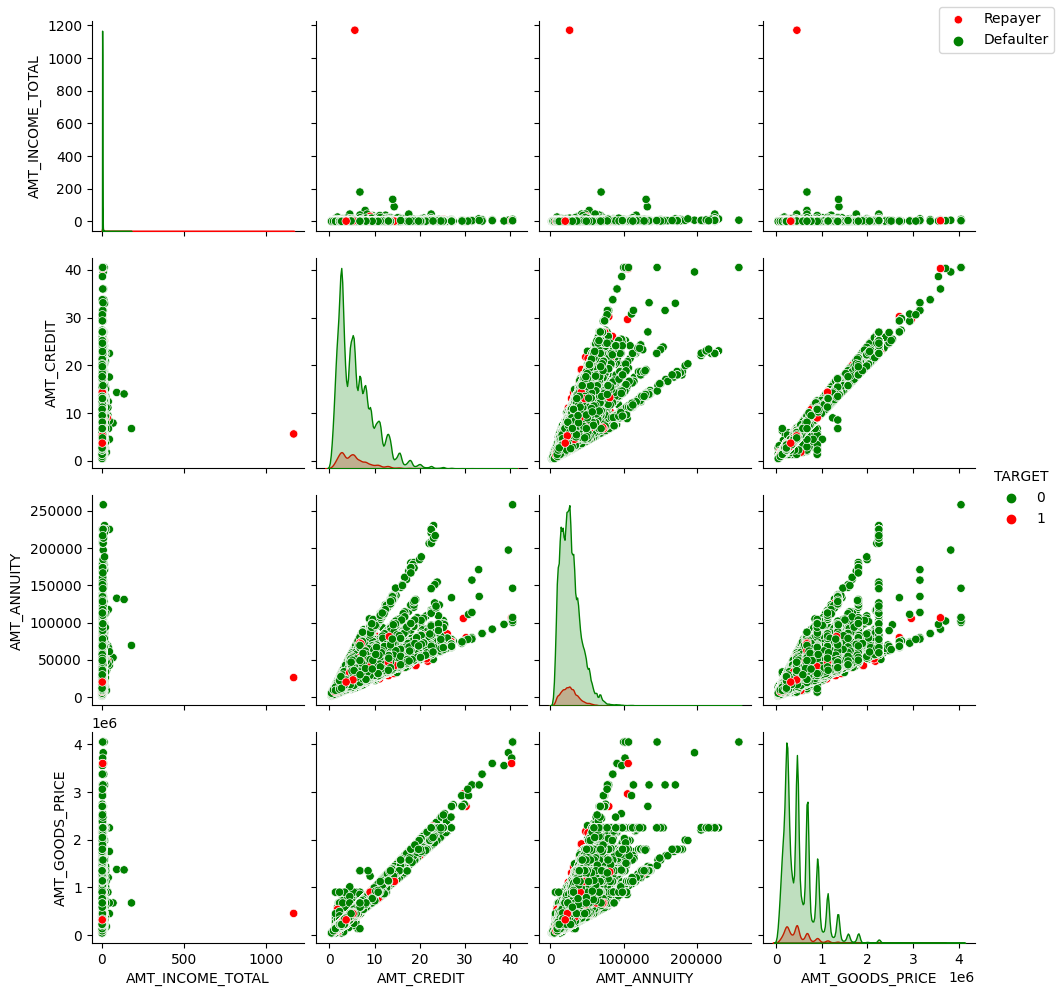

In [190]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = app_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

In [191]:
'''When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
There are very less defaulters for AMT_CREDIT >3M
'''

'When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters\nAMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line\nThere are very less defaulters for AMT_CREDIT >3M\n'

In [192]:
#univariate and bivarite analysisdone
#numerical data anlysis for mergeddata
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(app_df, prev_df, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,...,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,...,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,...,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,800-1200


In [193]:
loan_process_df.shape

(1413701, 89)

In [194]:
loan_process_df.size

125819389

In [195]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 89 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  int64   
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64 
 11  NAME_TYPE_SUITE_x             1413701 non-null  category
 12  NAME_INCOME_TY

In [196]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.413701e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,...,0.771284,8.803670e+02,3.149878e+02,1.256367e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,...,0.100644,7.835402e+02,7.695082e+03,1.448807e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,...,0.373150,1.000000e+00,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,...,0.715645,2.710000e+02,-1.000000e+00,0.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,...,0.835095,5.820000e+02,4.000000e+00,1.000000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,...,0.852537,1.313000e+03,8.500000e+01,1.800000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+03,4.050000e+01,2.250000e+05,4.050000e+06,7.250800e-02,2.520100e+04,3.652430e+05,...,1.000000,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [197]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

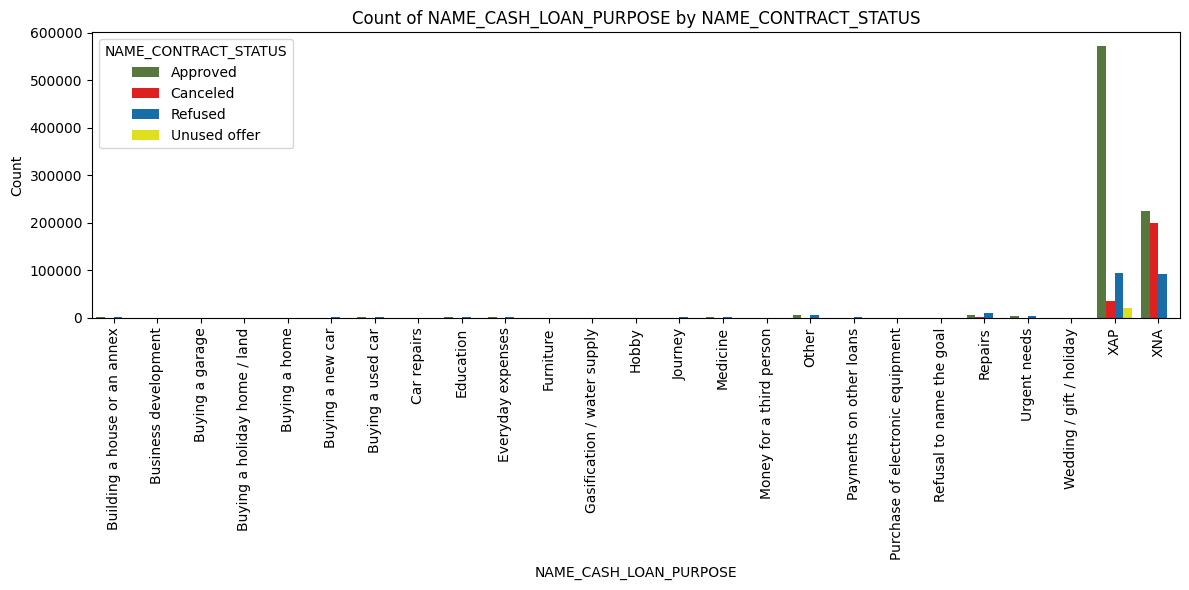

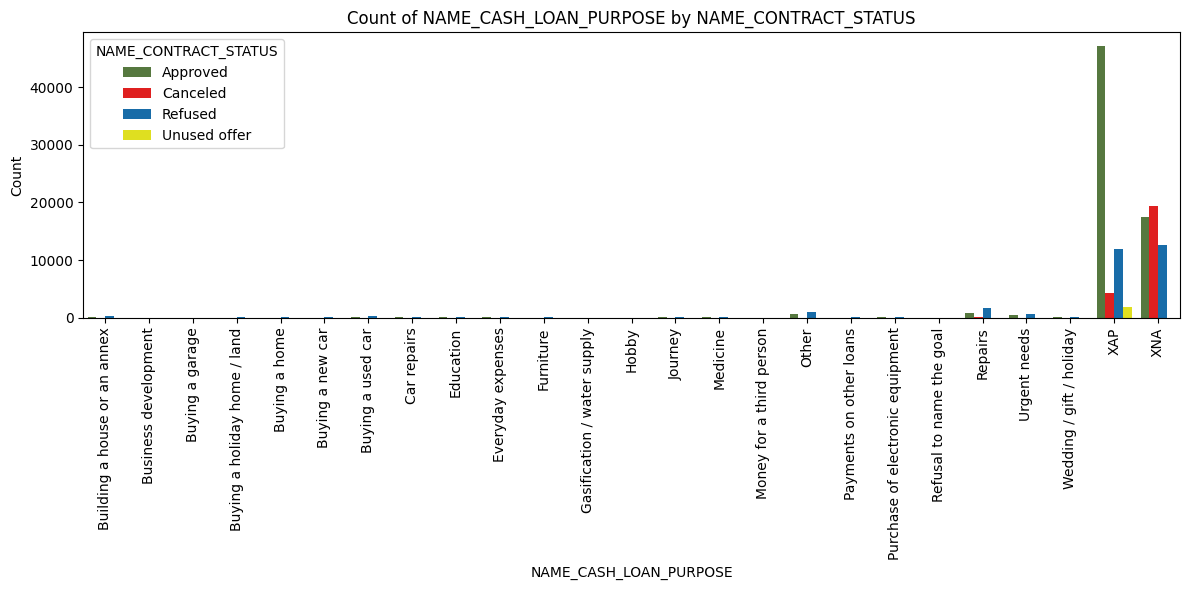

In [198]:
def univariate_merged(feature, data, hue_feature, palette, horizontal_layout=True, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(x=feature, data=data, hue=hue_feature, palette=palette)

    if horizontal_layout:
        plt.xticks(rotation=90)

    plt.title(f'Count of {feature} by {hue_feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=hue_feature)

    plt.tight_layout()
    plt.show()

# Example usage with adjusted figsize:
univariate_merged("NAME_CASH_LOAN_PURPOSE", L0, "NAME_CONTRACT_STATUS", ["#548235", "#FF0000", "#0070C0", "#FFFF00"], True, (12, 6))
univariate_merged("NAME_CASH_LOAN_PURPOSE", L1, "NAME_CONTRACT_STATUS", ["#548235", "#FF0000", "#0070C0", "#FFFF00"], True, (12, 6))

In [199]:
'''
Loan purpose has high number of unknown values (XAP, XNA)
Loan taken for the purpose of Repairs seems to have highest default rate
'''

'\nLoan purpose has high number of unknown values (XAP, XNA)\nLoan taken for the purpose of Repairs seems to have highest default rate\n'

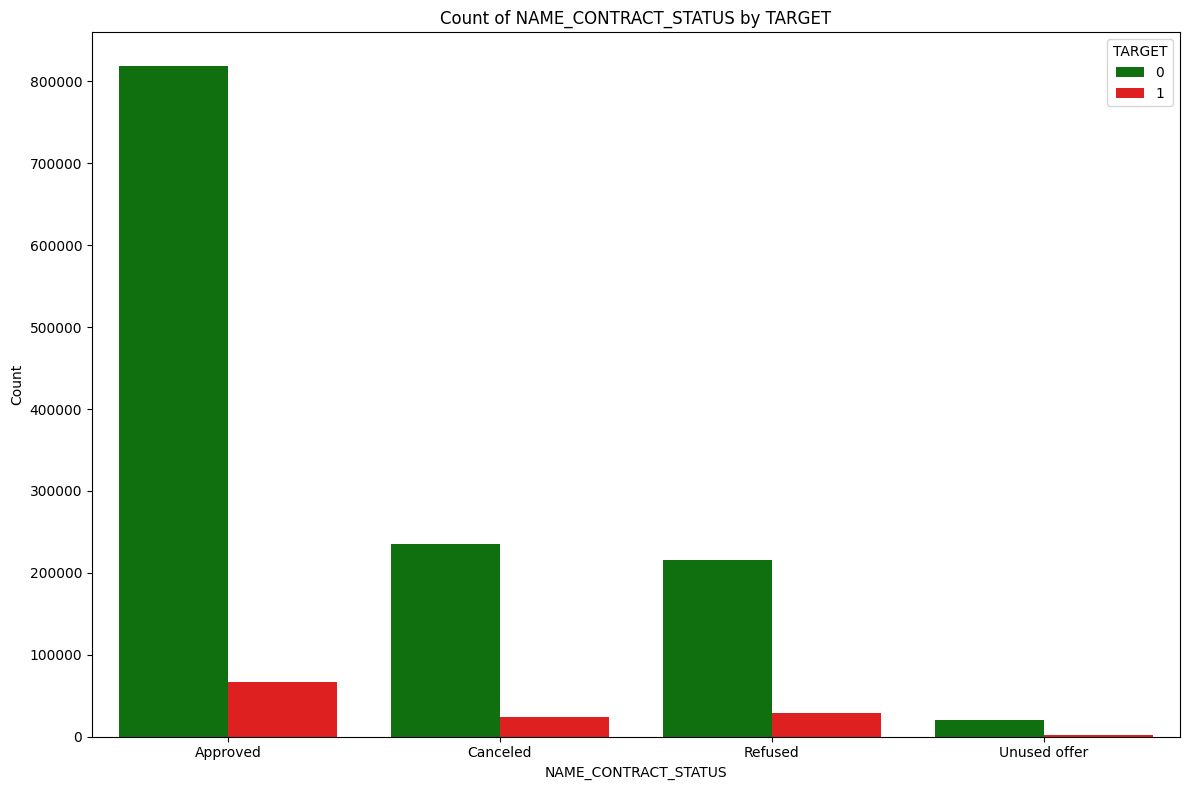

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [200]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

In [201]:
'''
90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients
88% of the clients who have been previously refused a loan has payed back the loan in current case.
'''

'\n90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients\n88% of the clients who have been previously refused a loan has payed back the loan in current case.\n'

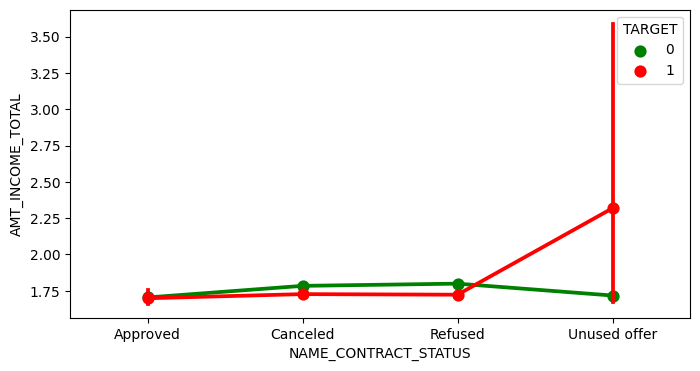

In [202]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

In [203]:
#The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others

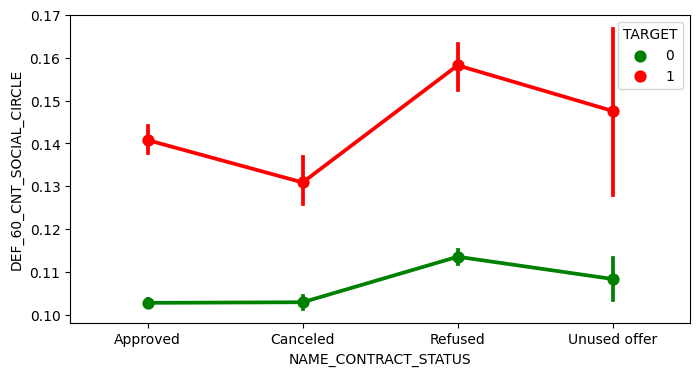

In [204]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

In [205]:
#Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score,
#tend to default more and hence client's social circle has to be analysed before providing the loan

In [206]:
'''
 Conclusions
 After analysing the datasets, there are few attributes of a client with which the bank would be able to identify ,
 if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization.
 '''



'\n Conclusions\n After analysing the datasets, there are few attributes of a client with which the bank would be able to identify ,\n if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization.\n '

In [207]:
#got to know from the analysis that
'''
Other suggestions:
90% of the previously cancelled client have actually repayed the loan. 
Record the reason for cancellation which might help the bank to determine and negotiate terms,
with these repaying customers in future for increase business opportunity.
88% of the clients who were refused by bank for loan earlier have now turned into a repaying client.
Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.
'''

'\nOther suggestions:\n90% of the previously cancelled client have actually repayed the loan. \nRecord the reason for cancellation which might help the bank to determine and negotiate terms,\nwith these repaying customers in future for increase business opportunity.\n88% of the clients who were refused by bank for loan earlier have now turned into a repaying client.\nHence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.\n'